# **NYC Property Price**

*Team 3* : \
*Shi (Sean) Wang*，*Ta-Wei Wang*，*Xifan (Ava) Wang*，*Mengxin Li*，*Fangfei (Phyllis) Cao*
 \
 \

##**Project's Goal**
Our project’s goal is to predict the property price of NYC, as well as analyze what factors affect NYC’s property price. We will be using Machine learning models and Python on a challenging large-scale dataset to make the price prediction of properties in New York City. For people who are considering purchasing properties in NYC or are interested in the real estate market, we provide useful insights and predictions. When encountering a potential purchase, one can evaluate whether the price is reasonable. Moreover, our project contributes to the research in the real estate market, given the specialty of New York City. 
 \
 \
Data Source:\
NYC Property Sales: https://www.kaggle.com/new-york-city/nyc-property-sales \

Original source:\
New York City Department of Finance: https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page \\

\






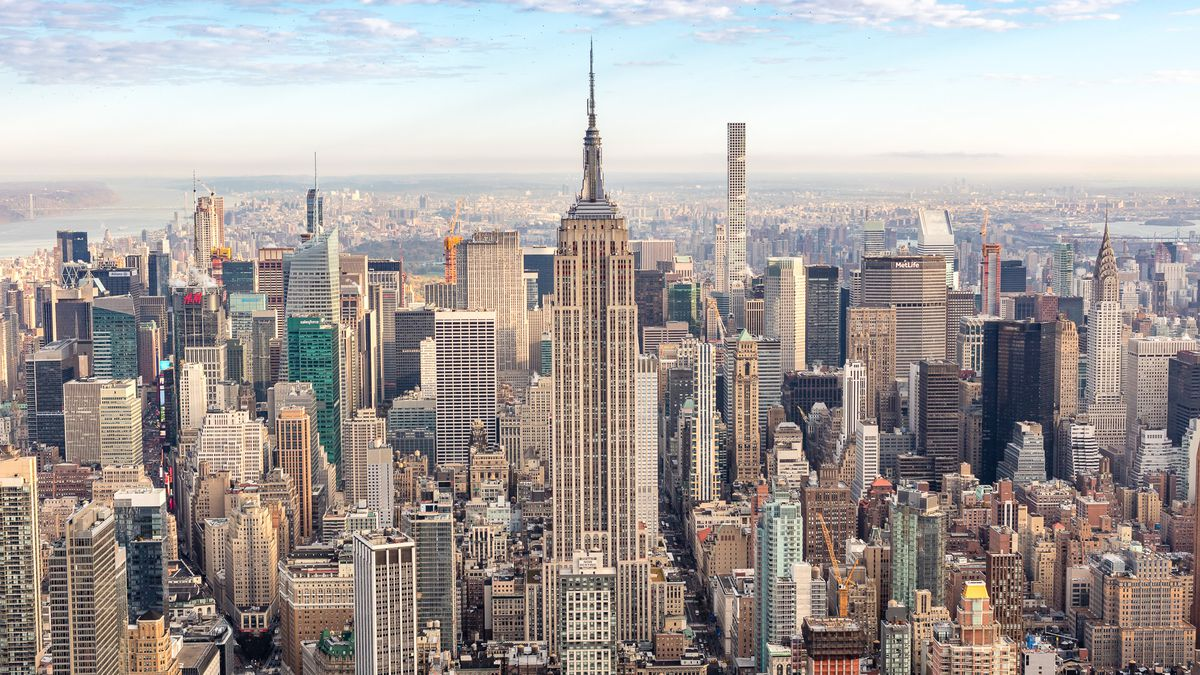

# **Agenda**
#### **I. Dataset Overview** 
>Data Source\
>Data Cleaning
#### **II. Exploratory Data Analysis (EDA)** 
>1.Correlation Heat Map

>2.Analysis on Single, Multiple Predictors and the Price.
>> Location Factors:\
>>*(1) Different sale price of the property in different Boroughs.*\
>>*(2) Various number of property and building in different boroughs.*

>>Building Features:\
>>*(3) How does gross square feet affect price?*\
>>*(4) Number of Units and the sale price.*\
>>*(5) Diffrent price ranges of different tax classes.*\
>>*(6) The relationship between building class and the sale price.*

>>Comparing Old and New Properties:\
>>*(7) Is there a relationship between year built and price?*

>3.Variables Analysis, multicollinearity
>>*(8) Relationship between neighbourhood and Year built.*\
>>*(9) Relationshipp between total unit and gross square feet.*

>4.Conclusion on EDA



\
#### **III. Machine Learning** 
>1.Data Preparation\
>2.Model Fit and Selection\
>3.Prediction Game

#### **IV. Conclusion** 

#### **V. References** 

## **I.Data Overview**



### **Data Source**


NYC Property Sales: https://www.kaggle.com/new-york-city/nyc-property-sales

Original source:
New York City Department of Finance: https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

This dataset contains the location, address, type, sale price, and sale date of building units sold.

*  Sale price of properties, the variable we mainly analyze and we will be predicting.

*   BOROUGH: A digit code for the borough the property is located in; in order these are 
>1 - Manhattan, 2 - Bronx, 3 - Brooklyn, 4 - Queens, 5 - Staten Island.
    
*  LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
    
*   BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. 
 
*   Tax Class, the tax level of each property.

*   Properties' square feet, total units, commercial units and residential units. 

*   The year in which the property was built.

*   Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
    
*   In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.


 \
**First, load the data and take a peek.**\
From this part, you can see how many rows and columns are contained in this dataset, and take a general look of what this dataset looks like.



Import necessary packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
print('This file has {} rows and {} columns.'.format(nyc_rolling_sales.shape[0] , nyc_rolling_sales.shape[1]))
nyc_rolling_sales.head(5)

This file has 84548 rows and 22 columns.


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [ ]:
nyc_rolling_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### **Data Cleaning**


>Before digging into exploration, our team cleaned the dataset firstly.

>We found there is a column called unamed, we could not interpret it, therefore we drop it. 

>*  For other columns, we replaced null values or invalid values with 0 or mean based on wether we have a reason to fill the value with the mean.
>*  For those row with null sale price, we drop them for two following reasons:
1. The saleprice is the y we will predict, we want to keep the data as close to the original data as possible.
2. We have more than 84000 rows of data, which should be a good amount.

>*  For other features such as land square feet, gross square feet, we filled the missing value with the mean of original data.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
df.drop('Unnamed: 0' , axis = 1, inplace = True)
df.drop('EASE-MENT' , axis = 1, inplace = True)
df['BOROUGH'] = df['BOROUGH'].astype('float64')
df['BLOCK'] = df['BLOCK'].astype('float64')
df['LOT']= df['LOT'].astype('float64')
df['ZIP CODE']= df['ZIP CODE'].astype('float64')
df['TOTAL UNITS']= df['TOTAL UNITS'].astype('float64')
df['COMMERCIAL UNITS'] = df['COMMERCIAL UNITS'].astype('float64')
df['RESIDENTIAL UNITS'] = df['RESIDENTIAL UNITS'].astype('float64')
df['YEAR BUILT'] = df['YEAR BUILT'].astype('float64')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('float64')
df['SALE PRICE'] = df['SALE PRICE'].replace(['0' , ' -  '] , 0).astype('float64')
df = df[df['SALE PRICE'] > 0]
#clean ' -  ' from land square feet and gross square feet, fill the -  with mean
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace(['0' , ' -  '] , np.nan).astype('float64')
lsqrf_avg = df['LAND SQUARE FEET'].mean(skipna = True)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace(np.nan, lsqrf_avg)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].replace(['0' , ' -  '] ,np.nan ).astype('float64')
gsqrf_avg = df['LAND SQUARE FEET'].mean(skipna = True)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].replace(0, gsqrf_avg)

In [ ]:
describe = df.describe()
describe

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04,2.933400e+04,59759.000000,59759.000000,5.975900e+04
mean,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,4.795526e+03,4.632911e+03,1810.107599,1.629629,1.494927e+06
std,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,3.613566e+04,3.417342e+04,505.745865,0.706166,1.232953e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.300000e+01,1.200000e+02,0.000000,1.000000,1.000000e+00
25%,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,2.500000e+03,1.361250e+03,1920.000000,1.000000,3.700000e+05
50%,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,4.795526e+03,1.874000e+03,1940.000000,2.000000,6.255000e+05
75%,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,4.795526e+03,2.680000e+03,1966.000000,2.000000,1.070000e+06
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [ ]:
columns = list(nyc_rolling_sales.columns)
print('Percentage of NULL values in each column:' , '\n')
for i in columns:
    print("{0:35s} {1}".format(i,str(round(nyc_rolling_sales[i].isnull().sum()/nyc_rolling_sales.shape[0] * 100 , 4)) + '%' ))

Percentage of NULL values in each column: 

Unnamed: 0                          0.0%
BOROUGH                             0.0%
NEIGHBORHOOD                        0.0%
BUILDING CLASS CATEGORY             0.0%
TAX CLASS AT PRESENT                0.0%
BLOCK                               0.0%
LOT                                 0.0%
EASE-MENT                           0.0%
BUILDING CLASS AT PRESENT           0.0%
ADDRESS                             0.0%
APARTMENT NUMBER                    0.0%
ZIP CODE                            0.0%
RESIDENTIAL UNITS                   0.0%
COMMERCIAL UNITS                    0.0%
TOTAL UNITS                         0.0%
LAND SQUARE FEET                    0.0%
GROSS SQUARE FEET                   0.0%
YEAR BUILT                          0.0%
TAX CLASS AT TIME OF SALE           0.0%
BUILDING CLASS AT TIME OF SALE      0.0%
SALE PRICE                          0.0%
SALE DATE                           0.0%


>>>After cleaning, there is no NULL value in our dataset.

In [ ]:
features = ['BOROUGH' , 'BLOCK' , 'LOT' , 'ZIP CODE' , 'RESIDENTIAL UNITS' , 'COMMERCIAL UNITS' , 'TOTAL UNITS' , 'LAND SQUARE FEET' , 'GROSS SQUARE FEET' , 'YEAR BUILT' , 'TAX CLASS AT TIME OF SALE' , 'SALE PRICE']
feature_std = [1.326832e+00 , 3.568943e+03 , 6.708443e+02 , 1.264098e+03 , 1.415940e+01 , 9.821318e+00 , 1.733777e+01 , 3.615489e+04 , 2.394764e+04 , 5.057459e+02 , 7.061664e-01 , 1.232953e+07]
variable_std = pd.DataFrame({'features' : features , 'std' : feature_std})
variable_std

,features,std
0,BOROUGH,1.326832e+00
1,BLOCK,3.568943e+03
2,LOT,6.708443e+02
3,ZIP CODE,1.264098e+03
4,RESIDENTIAL UNITS,1.415940e+01
5,COMMERCIAL UNITS,9.821318e+00
6,TOTAL UNITS,1.733777e+01
7,LAND SQUARE FEET,3.615489e+04
8,GROSS SQUARE FEET,2.394764e+04
9,YEAR BUILT,5.057459e+02


>>> All variables have non-zero standard deviations, which means they all are not constant values.

## **II. Exploratory Data Analysis (EDA)**




### **Heat map showing the correlation amaong variables.**
*  The darker the blue, the greater the correlation.
From this heat map, we don't see there is a single strong variable, since  the color of sale price's corresponding blocks are all relatively light.
Some blocks corresponding to variables are relatively darker, which indicates a correlation.
*  As we can see from the heat map, none of the variables seems to be a single predictor that strongly correlated to the sale price using regression. And some features are correlated to each other. Next, we decide to find out how does each feature affect the sale price?

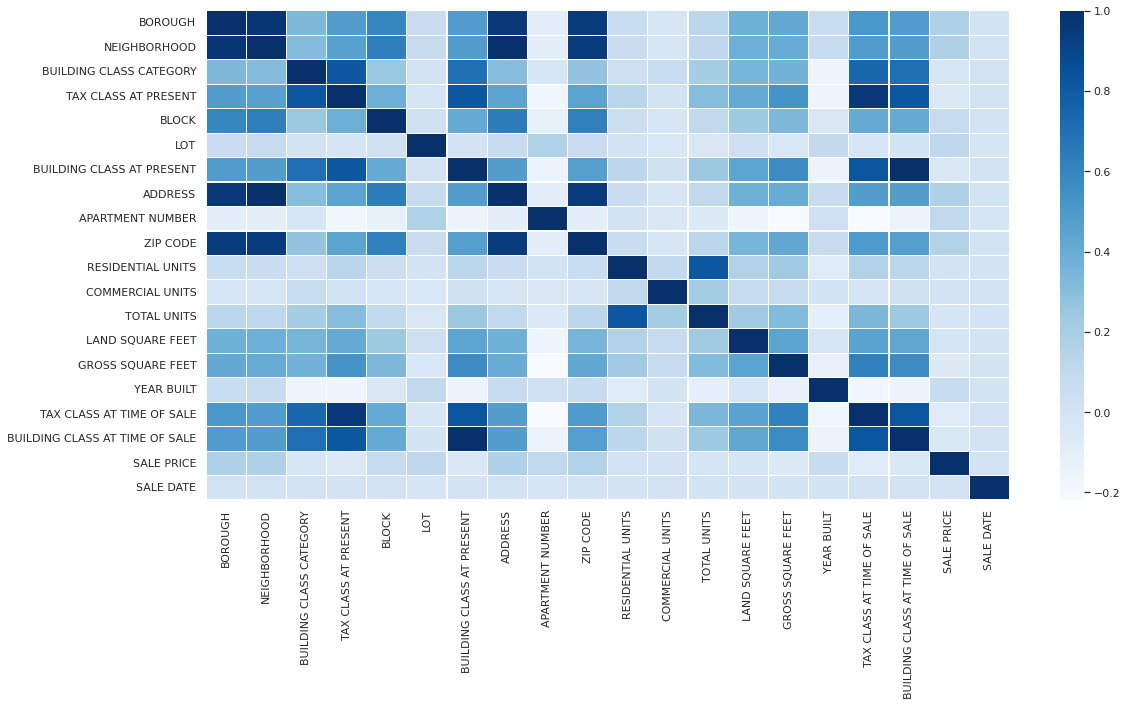

In [ ]:
plt.figure(figsize=(18, 9))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="Blues")

### **Analysis on each possible predictor and their relationship with sale price**






In order to see how each variable affect the sale price, we will explore the correlation between each variable and the sale price.

> #### **Location Factors** 
*For this section, we look at location factors, and how sale price change in different place in NYC.*

>> ##### **(1) Sale Price and Boroughs.**


>>>We investigated how sale price and number of properties varies in different boroughs.
>>Comparing the mean price of 5 different boroughs, we can see the difference looks significant. By common sense, we also know that, price of house varies in different locations. Therefore, we naturally starts with borough as the first varible to analyze. 
The number of the borough indicate each borough accordingly:
>>>1.Manhattan, 2.Bronx, 3.Brooklyn, 4.Queens, 5.Staten Island.


In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
nyc_rolling_sales['SALE PRICE'] = nyc_rolling_sales['SALE PRICE'].replace(' -  ', 0).astype('int64')
nyc_rolling_sales = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] > 0) & (nyc_rolling_sales['ZIP CODE'] >= 10000)]

In [ ]:
Borough_name = pd.DataFrame({'Borough Number': [1 , 2 , 3 , 4 , 5],
                   'Borough Name': ['Manhattan' , 'Bronx' , 'Brooklyn' , 'Queens' , 'Staten Island']})

In [ ]:
Q6 = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] != 0) & (nyc_rolling_sales['SALE PRICE'] != ' -  ')]
Q6['SALE PRICE'] = Q6['SALE PRICE'].astype('float64')
Q6 = Q6[Q6['SALE PRICE'] > 0]
Mean_Price_by_borough = Q6[['BOROUGH', 'SALE PRICE']].groupby(by='BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()
Mean_Price_by_borough

,BOROUGH,SALE PRICE
0,5,5.229320e+05
1,4,7.395363e+05
2,2,8.064775e+05
3,3,1.279462e+06
4,1,3.313596e+06


,Borough Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


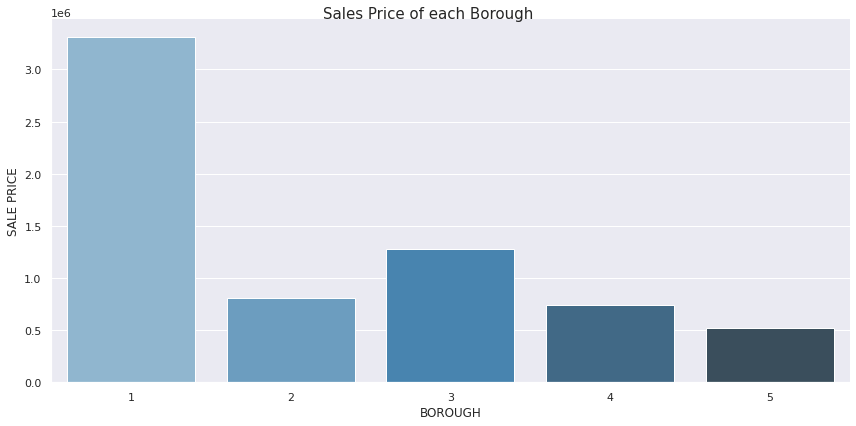

In [ ]:
Q6_plot=sns.catplot(x="BOROUGH", y="SALE PRICE", data=Mean_Price_by_borough , kind = 'bar' , height = 6 , aspect = 2 , palette = 'Blues_d')
Q6_plot.fig.suptitle('Sales Price of each Borough' , fontsize = 15)
Borough_name

>>>As we can see from the plot above, the sale price significantly differs in different boroughs. Properties in Manhattan are most expensive, wich corresponds with our common sense. \
We also investigate the relationship between zip code and the sale price.

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
nyc_rolling_sales['SALE PRICE'] = nyc_rolling_sales['SALE PRICE'].replace(' -  ', 0).astype('int64')
nyc_rolling_sales = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] > 0) & (nyc_rolling_sales['ZIP CODE'] >= 10000)]

nyc_rolling_sales['ZIP CODE'].unique()

price_zip = nyc_rolling_sales.groupby('ZIP CODE').agg({'SALE PRICE':'mean'}).astype('int64')
price_zip = price_zip.sort_values('SALE PRICE')
price_zip.reset_index(inplace=True)
price_zip.sort_values('SALE PRICE' , ascending = False).head(10)

,ZIP CODE,SALE PRICE
182,10167,2210000000
181,10001,16291306
180,10018,11346411
179,10004,11262811
178,10005,10533032
177,10013,6721802
176,10007,4807608
175,10006,4343993
174,10035,4177099
173,10012,3945462


>>##### **(2)Various number of property and building in different boroughs.**



>>> * Next, we went deeper on borough. we examed the relationship between number of different buildings and the brough.
>>> * Table nyc_builing_claasification shows what each type of building class means. The table is long, we only show part of it there.
>>> * Since building types start with the same character are similar to each other, we re-classify the building class accordingt to the starting character.
>>> *  We used table, box plot, pie chart and bar chart showing the number of buildings for each type in each borough.
>>> *  Top 5 types of buildings are: R,A,B,D,C.
>>> * Following tables show what types these buildings are.


In [ ]:
nyc_building_classification = pd.read_csv('https://github.com/Sean-SW/Building-Classification/blob/be0d5ea9488ffa21baac5211c59d4725a009dac9/nyc_building_classification.csv?raw=true')
nyc_building_classification = pd.DataFrame(nyc_building_classification)
nyc_building_classification = nyc_building_classification.drop('Unnamed: 2' , axis = 1)
nyc_building_classification.set_index('Building Code' , inplace = True)
nyc_building_classification.head(15)

,Description
Building Code,
A0,CAPE COD
A1,TWO STORIES - DETACHED SM OR MID
A2,ONE STORY - PERMANENT LIVING QUARTER
A3,LARGE SUBURBAN RESIDENCE
A4,CITY RESIDENCE ONE FAMILY
A5,ONE FAMILY ATTACHED OR SEMI-DETACHED
A6,SUMMER COTTAGE
A7,MANSION TYPE OR TOWN HOUSE
A8,BUNGALOW COLONY - COOPERATIVELY OWNED LAND


>>>There are over 200 building classes.\
The count list is generated below,shows how many propeties under each building class.

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
nyc_rolling_sales['General Class']=nyc_rolling_sales['BUILDING CLASS AT TIME OF SALE'].str[0]
a = nyc_rolling_sales['General Class'].groupby(nyc_rolling_sales['General Class']).count().sort_values(ascending=False)
a = pd.DataFrame(a)
a

,General Class
General Class,
R,20972
A,17862
B,15029
D,13284
C,10617
S,1843
V,1711
K,935
G,753


In [ ]:
nyc_building_classification.loc[['R4' , 'R3' , 'R1' , 'R9' , 'RG']]

,Description
Building Code,
R4,CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.
R3,CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.
R1,CONDO; RESIDENTIAL UNIT IN 2-10 UNIT BLDG.
R9,CO-OP WITHIN A CONDOMINIUM
RG,INDOOR PARKING


In [ ]:
nyc_building_classification.loc[['A0', 'A1', 'A2','A3','A4','A5','A6', 'A7', 'A8', 'A9']]

,Description
Building Code,
A0,CAPE COD
A1,TWO STORIES - DETACHED SM OR MID
A2,ONE STORY - PERMANENT LIVING QUARTER
A3,LARGE SUBURBAN RESIDENCE
A4,CITY RESIDENCE ONE FAMILY
A5,ONE FAMILY ATTACHED OR SEMI-DETACHED
A6,SUMMER COTTAGE
A7,MANSION TYPE OR TOWN HOUSE
A8,BUNGALOW COLONY - COOPERATIVELY OWNED LAND


In [ ]:
nyc_building_classification.loc[['B1', 'B2', 'B3', 'B9']]

,Description
Building Code,
B1,TWO FAMILY BRICK
B2,TWO FAMILY FRAME
B3,TWO FAMILY CONVERTED FROM ONE FAMILY
B9,MISCELLANEOUS TWO FAMILY


In [ ]:
nyc_building_classification.loc[['D0', 'D1', 'D2', 'D4','D5','D6','D7','D8','D9']]

,Description
Building Code,
D0,ELEVATOR CO-OP; CONVERSION FROM LOFT/WAREHOUSE
D1,ELEVATOR APT; SEMI-FIREPROOF WITHOUT STORES
D2,ELEVATOR APT; ARTISTS IN RESIDENCE
D4,ELEVATOR COOPERATIVE
D5,ELEVATOR APT; CONVERTED
D6,ELEVATOR APT; FIREPROOF WITH STORES
D7,ELEVATOR APT; SEMI-FIREPROOF WITH STORES
D8,ELEVATOR APT; LUXURY TYPE
D9,ELEVATOR APT; MISCELLANEOUS


>>> The number of properties of different building class.\
Top 5 are R, A, B, D, C.

Text(0.5, 1.0, 'Number of Properties Based On BUILDING CLASS AT TIME OF SALE')

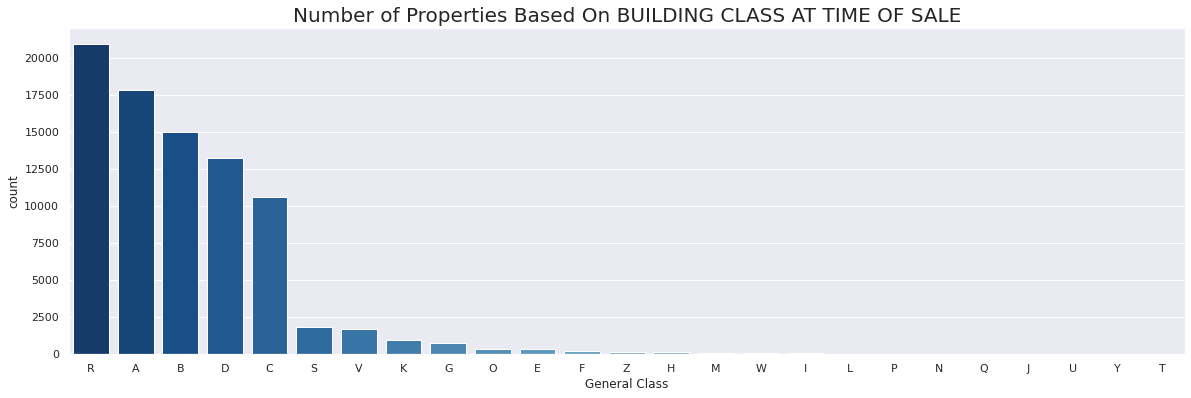

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='General Class',data=nyc_rolling_sales,order = nyc_rolling_sales['General Class'].value_counts().index , palette = 'Blues_r')
plt.title('Number of Properties Based On BUILDING CLASS AT TIME OF SALE' , fontsize = 20)

>>>*  Class R, A, B, D have the most number of properties while U, T, Y class have the least number of properties.
>>>*   The following plot shows a rank of the number of different class R properties.
>>>*  The most common R class building is residential Condo with elevators.

,Description
Building Code,
R4,CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.
R3,CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.
R1,CONDO; RESIDENTIAL UNIT IN 2-10 UNIT BLDG.
R9,CO-OP WITHIN A CONDOMINIUM
RG,INDOOR PARKING


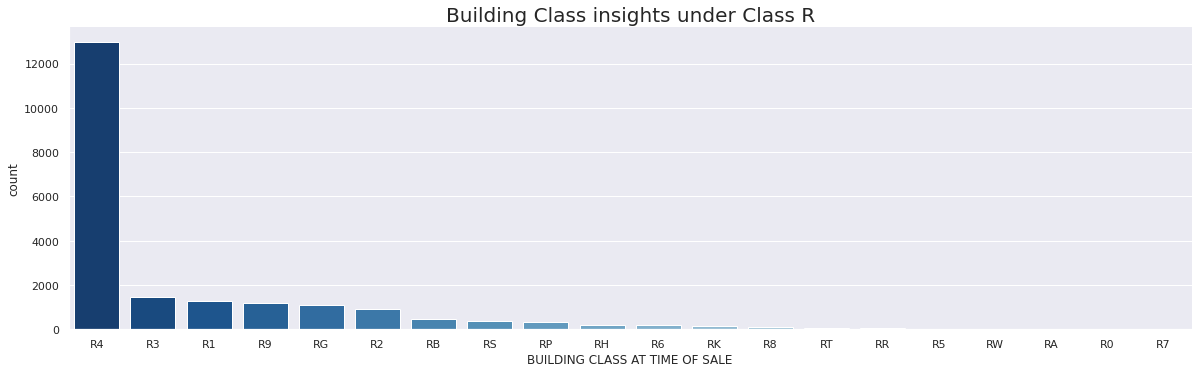

In [ ]:
R_table=nyc_rolling_sales[nyc_rolling_sales['General Class']=='R']
sns.catplot(x="BUILDING CLASS AT TIME OF SALE",data=R_table, kind="count",
               height=5,aspect=3.35,order = R_table['BUILDING CLASS AT TIME OF SALE'].value_counts().index , palette = 'Blues_r')
plt.title('Building Class insights under Class R' , fontsize = 20)
nyc_building_classification.loc[['R4' , 'R3' , 'R1' , 'R9' , 'RG']]

,Borough Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


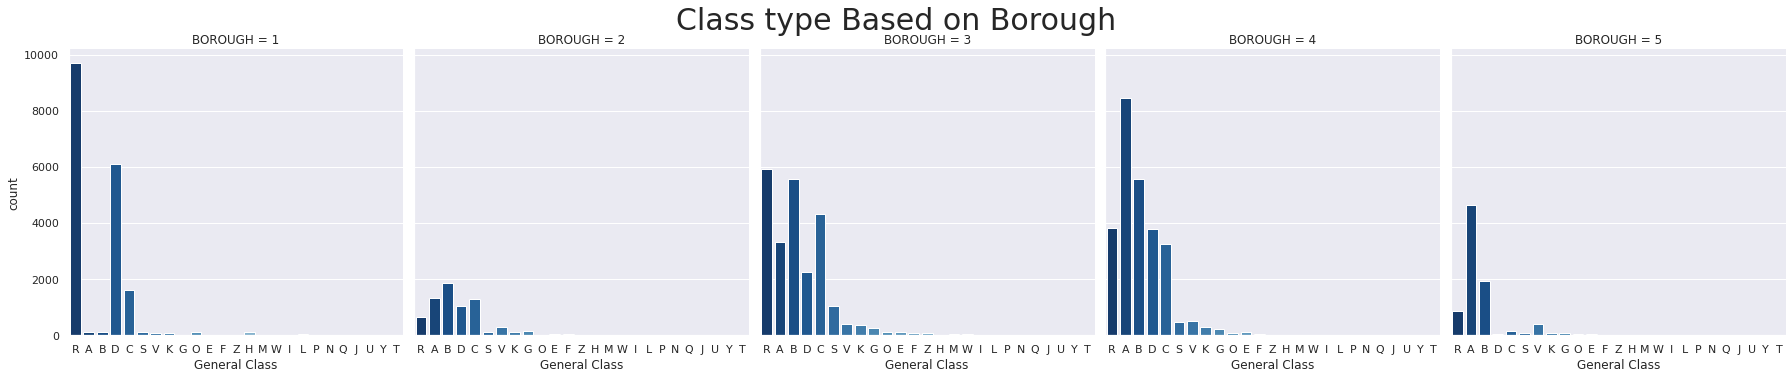

In [ ]:
g = sns.catplot(x="General Class",col="BOROUGH",data=nyc_rolling_sales, kind="count",
               height=5,aspect=1,order = nyc_rolling_sales['General Class'].value_counts().index , palette = 'Blues_r')
g.fig.suptitle('Class type Based on Borough' , fontsize = 30,verticalalignment='baseline')
Borough_name

>>>From the last plot Class type based on Borough, we found out that most R class buildings located in Manhattan. From previous table, we know A many of types of buildings are large house such as suburban recidence.\
B and D class are  also prominent, but there are only a few A class in Manhattan.\
There are more R,A,B,D,C class of buildings in Staten Island.\
There are generally less buildings in Bronx.


\\

>####  **Building Features**
*Besides location factors, we also have some building features in our dataset.For this section, we investigate how sale price differs for the difference in building features such as square feet of the property, number of units, and also the tax class.*

>> ##### **(3) Relationship between price and Gross Square Feet.**

>>>From the graph presented below, we can see that there is a positive relation between gross square feet and sale price. The positive relationship is relatively srong in borough 1, 2, and 3.

>>>Firstly, we check the correlation using scatter plot.

>>>Then, we dropped some outliers.

>>>Last, we can see a clearer correlation from the plot.

>>>We believe square feet of each property is a good predictor according this plot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


,Borough Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


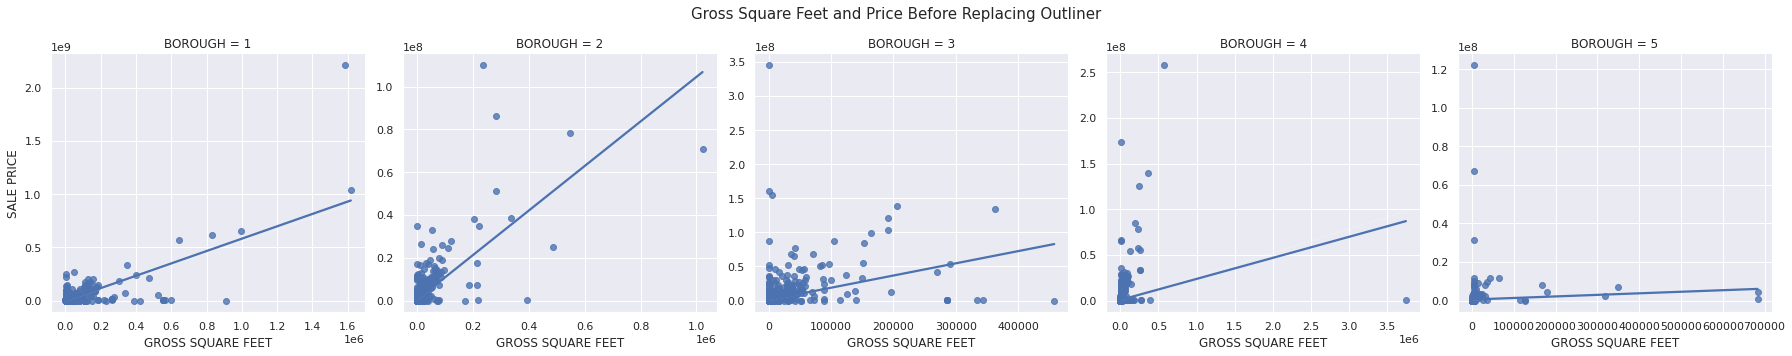

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
Q2 = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] != 0) & (nyc_rolling_sales['SALE PRICE'] != ' -  ')]
Q2['SALE PRICE'] = Q2['SALE PRICE'].astype('float64')
Q2 = Q2[Q2['SALE PRICE'] > 0]
gross_square_feet_mean = Q2['GROSS SQUARE FEET'].replace( ' -  ' , np.nan ).astype('float64').mean(skipna = True)
Q2['GROSS SQUARE FEET'] = Q2['GROSS SQUARE FEET'].replace( ' -  ' , str(gross_square_feet_mean) ).astype('float64')

gsf_p_lm = sns.lmplot(x = 'GROSS SQUARE FEET'  , y = 'SALE PRICE' , data = Q2  , col = 'BOROUGH' , sharex=False, sharey=False , ci = False , palette= 'Blues_r')
gsf_p_lm.fig.subplots_adjust(top=0.85)
gsf_p_lm.fig.suptitle('Gross Square Feet and Price Before Replacing Outliner' , fontsize = 15)
Borough_name

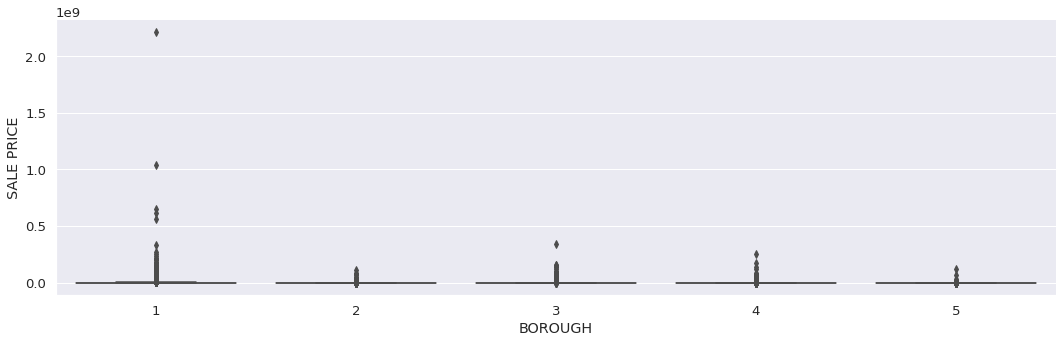

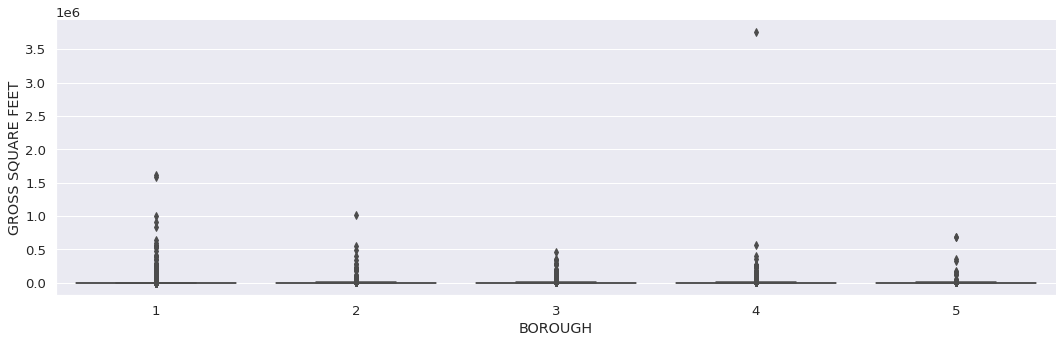

In [ ]:
sns.set(font_scale= 1.2)
sns.catplot(x = 'BOROUGH'  , y = 'SALE PRICE', data = Q2 , kind = 'box' ,height = 5,  aspect = 3)
sns.catplot(x = 'BOROUGH' , y = 'GROSS SQUARE FEET', data = Q2 , kind = 'box' ,height = 5 , aspect = 3)

>>>The plot above shows one data point seems to be an outlier which is the one at borough 4. Most properties at borough 4 are between 0 - 1000 square feet. That data point is over 3.5k.\
We did two sets of scatter plot showing correlations before and after dropping some extreme values, to see if the correlation become more significant.\
 This plot below shows the new correlation after we dropped the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


,Borough Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


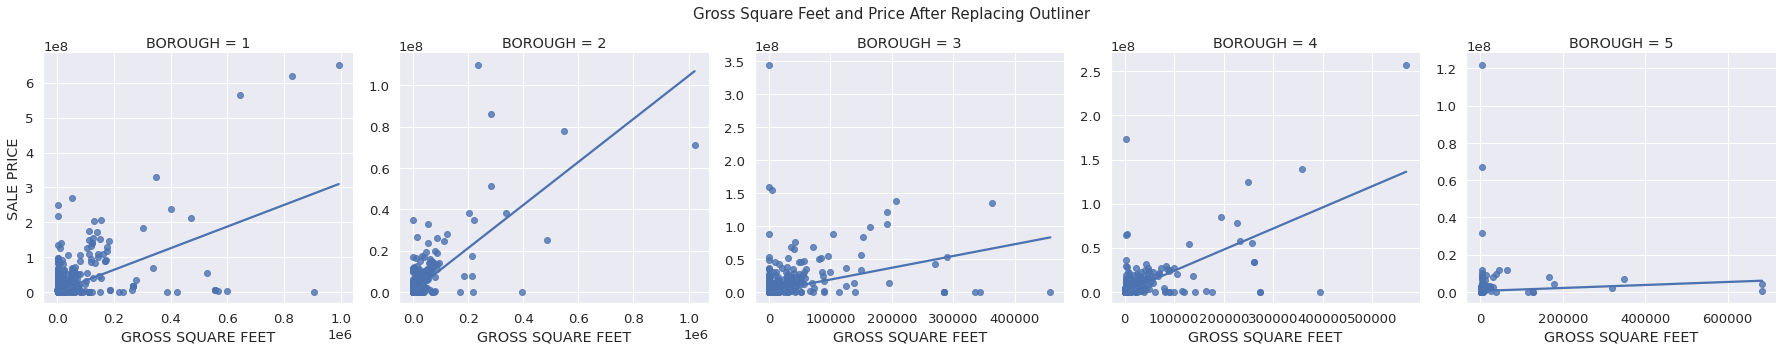

In [ ]:
Q2 = Q2[Q2['GROSS SQUARE FEET'] < 2000000]
Q2 = Q2[Q2['SALE PRICE'] < 1000000000]

gsf_p_lm = sns.lmplot(x = 'GROSS SQUARE FEET'  , y = 'SALE PRICE' , data = Q2  , col = 'BOROUGH' , sharex=False, sharey=False , ci = False , palette= 'Blues_r')
gsf_p_lm.fig.subplots_adjust(top=0.85)
gsf_p_lm.fig.suptitle('Gross Square Feet and Price After Replacing Outliner' , fontsize = 15)
Borough_name

>>>The plot above is the new graph generated after filtering. The correlation seems to be more abvious.

>>##### **(4) Number of Units and the sale price.**

>>>*  After generating the scatter plot, we find out that the relationship between units and sale price seems not to be a simple line.
>>>*  The scatter plot doesn't show a significant correlation.
>>>*  Using common sense, we know that the square feet maybe related to number units. So we generated a 3-D plot to show the how sale price locate in the scale square feet and number of total units.

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
Q9 = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] != 0) & (nyc_rolling_sales['SALE PRICE'] != ' -  ')]
Q9['SALE PRICE'] = Q9['SALE PRICE'].astype('float64')
Q9 = Q9[Q9['SALE PRICE'] > 0]
Q9['TOTAL UNITS'] = Q9['TOTAL UNITS'].replace(['0' , ' -  '] , 0).astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, 'Commercial Units and Sale Price')

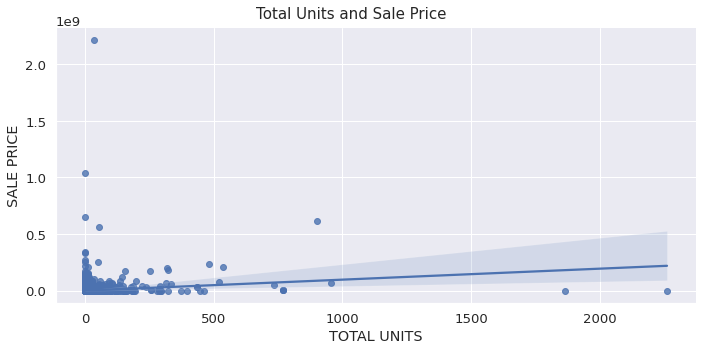

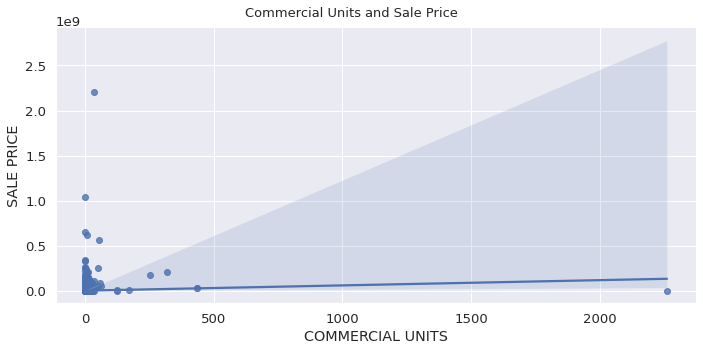

In [ ]:
total_u_vs_sale_price = sns.lmplot(x="TOTAL UNITS", y="SALE PRICE" , data= Q9 , palette= 'Blues_r' , height = 5 , aspect = 2)
total_u_vs_sale_price.fig.suptitle('Total Units and Sale Price' , fontsize = 15)
commer_u_vs_sale_price = sns.lmplot(x="COMMERCIAL UNITS", y="SALE PRICE", data= Q9 , palette= 'Blues_r' , height = 5 , aspect = 2)
commer_u_vs_sale_price.fig.suptitle('Commercial Units and Sale Price' , fontsize = 13)

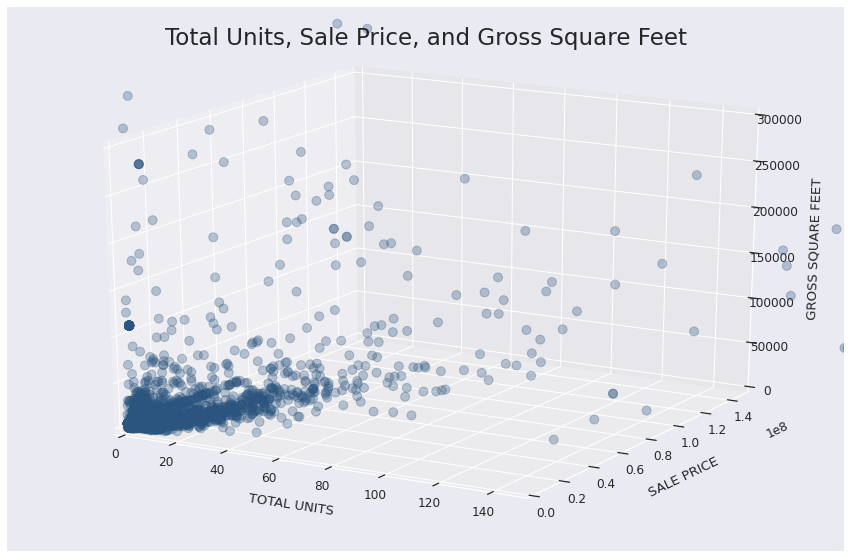

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
df['SALE PRICE'] = df['SALE PRICE'].replace(['0' , ' -  '] , 0).astype('float64')
df = df[df['SALE PRICE'] > 0]
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace(['0' , ' -  '] , np.nan).astype('float64')
lsqrf_avg = df['LAND SQUARE FEET'].mean(skipna = True)
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace(np.nan, lsqrf_avg)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].replace(['0' , ' -  '] , np.nan).astype('float64')
gsqrf_avg = df['LAND SQUARE FEET'].mean(skipna = True)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].replace(np.nan, gsqrf_avg)
df['TOTAL UNITS']= df['TOTAL UNITS'].astype('float64')

fig = plt.figure(figsize = (15,10))
sns.set(font_scale=1.1)
ax = fig.add_subplot(111 , projection = '3d')
x = df['TOTAL UNITS']
y = df['SALE PRICE']
z = df['GROSS SQUARE FEET']
ax.scatter ( x , y , z , s = 80 , alpha = 0.3 , color = '#2B547E')
ax.set_title('Total Units, Sale Price, and Gross Square Feet' , fontsize = 23)
ax.set_xlabel('TOTAL UNITS' , labelpad = 15)
ax.set_ylabel( 'SALE PRICE' , labelpad = 15)
ax.set_zlabel( 'GROSS SQUARE FEET' , labelpad = 15)
ax.set_xlim( 0 , 150)
ax.set_ylim(0 , 150000000)
ax.set_zlim(0 , 300000)
ax.view_init( 20,  )
plt.show()

>>>The plot above shows there might be 2 directions of sale price interms of total units and gross square feet.\
This indicates that when we do machine learning later, we will need to do feature engineering on gross square feet and number of units.

>>##### **(5) Relationship between Tax Class and Price.**

>>>*  After examing other building features, we look at one of features that we are not that farmilar with. 
*  We are curious about the relationship between tax class and the sale price. In short, would the price be significantly different given different tax class of the property.
*  As we can see from the graph below, different tax class corresponds to different range of the sale price. Specifically, the higher class would have wider range of sale price, indicating possible higher sale price. With this result, we can be confident that we have a reason to use Tax Class as one of our predictors.

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
Q5 = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] != 0) & (nyc_rolling_sales['SALE PRICE'] != ' -  ')]
Q5['SALE PRICE'] = Q5['SALE PRICE'].astype('float64')
Q5 = Q5[Q5['SALE PRICE'] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


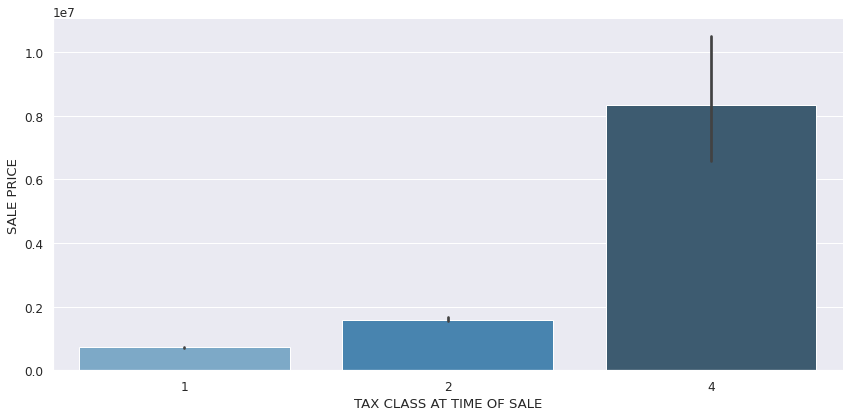

In [ ]:
tax_class_vs_sale_price = sns.catplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", data=Q5 , kind = 'bar' , height = 6 , aspect = 2 , palette = 'Blues_d')

>>##### **(6) Building Class and Sale Price.**

*  As we can see from the graph below, the sale price varies based on different types of building class, whic means, buildings for various purpose have various sale price.
*  R, A, B, D, C are top 5 most common types of properties. (We also done that in the previous section.)
*  O, H, J, Y, N are top 5 most expensive types of properties.

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
nyc_rolling_sales['SALE PRICE'] = nyc_rolling_sales['SALE PRICE'].replace(['0' , ' -  '] , 0).astype('float64')
nyc_rolling_sales['General Class']=nyc_rolling_sales['BUILDING CLASS AT TIME OF SALE'].str[0]

In [ ]:
build_class_price = nyc_rolling_sales.groupby('General Class').agg({'SALE PRICE':'mean'}).astype('int64')
build_class_price.sort_values('SALE PRICE', ascending=False, inplace = True)
build_class_price.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'BUILDING CLASS AT TIME OF SALE')

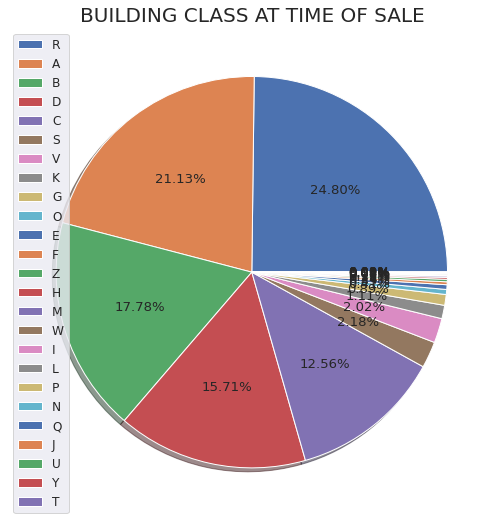

In [ ]:
plt.figure(figsize=(25, 9))
sns.set_palette("deep")
plt.pie(a , shadow = True , autopct= '%.2f%%')
plt.legend(a.index)
plt.title('BUILDING CLASS AT TIME OF SALE' , fontsize = 20)

>>>Following are the building classes that are relatively more expensive.
*  O: Mainly are office rooms.
*  H: All types of hotels.
*  J: Commercial units, mainly theatres.
*  N: Different types of orphanages. 
*  Y: Public departments, such as fire department, department of sanitation.
*  L: Diffrent kinds of lofts.

>>> We notice that the 5 most types of buildings are all for buisiness, public or commercial use. Starts with 6th, which is loft, becomes the most expensive living property in NYC. 
>>>Distribution of sale price in different boroughs is shown below.We can see a significant difference among the sale price in different boroughs.

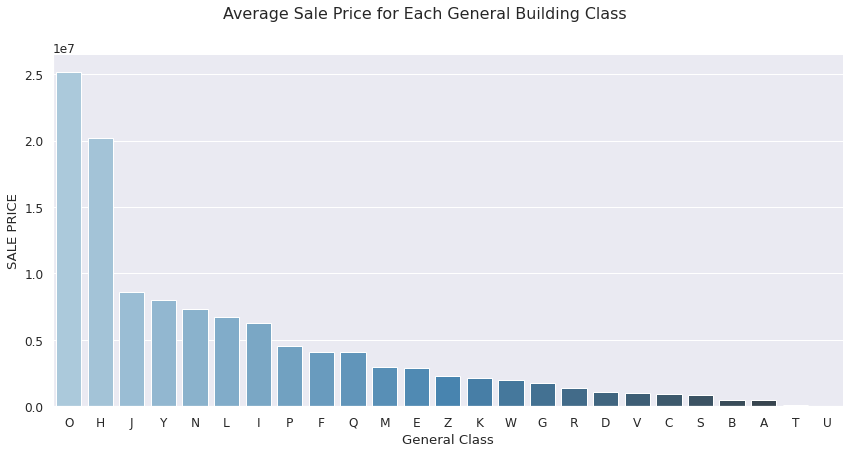

In [ ]:
Q8_plot = sns.catplot(x = 'General Class',y='SALE PRICE', data = build_class_price, kind='bar',palette = 'Blues_d' , height = 6 , aspect = 2);
Q8_plot.fig.suptitle('Average Sale Price for Each General Building Class',y = 1.05);

>####  **Comparing Old and New Properties**

>> ##### **(7) Relationship between Year Built and Price.**

>>>*  Besides, we also creat a line plot to see how did the sale price change with time passes. We wonder if there is a general trend of the property price, so we can use time as one of the predictors.
>>>*  following graph shows the sales price changes overtime through 1800 to 2000

Text(0.5, 1.0, 'Price average for houses built each year')

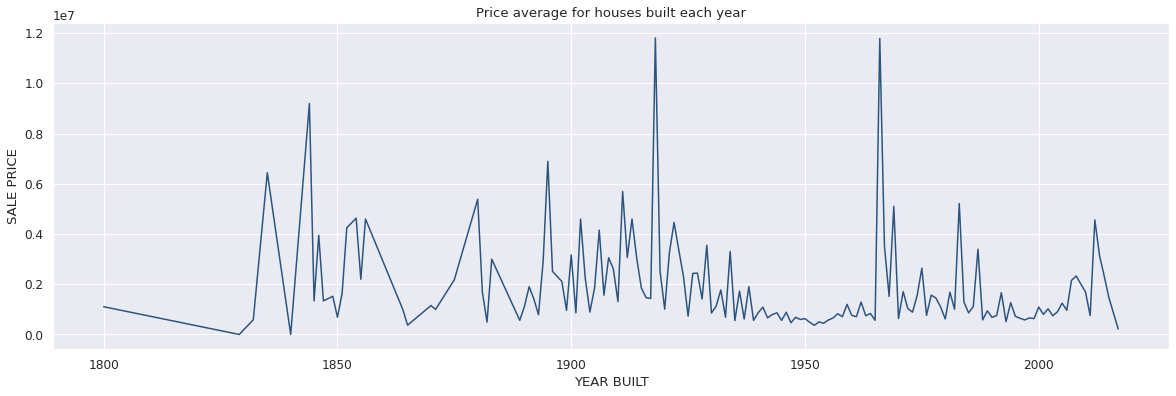

In [ ]:
%matplotlib inline
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
drop_null = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE']!=0)&(nyc_rolling_sales['SALE PRICE']!=' -  ')&(nyc_rolling_sales['SALE PRICE']!='')&(nyc_rolling_sales['YEAR BUILT']!=0)&(nyc_rolling_sales['YEAR BUILT']!=1111)]
drop_null_sort = drop_null.sort_values('SALE PRICE',ascending=False)
Q3_col = drop_null[['YEAR BUILT','SALE PRICE']].astype('int64')
Q3_col_group = Q3_col.groupby(['YEAR BUILT']).mean().sort_values('YEAR BUILT',ascending=True)
plt.figure(figsize=(20, 6))
sns.lineplot(data=Q3_col_group,x='YEAR BUILT',y='SALE PRICE' , color = '#2B547E' ).set_title('Price average for houses built each year')

>>> *  The plot above shows there are two times of abnormal sharp increase of property price, which are 1921 and 1966. 1921 is the year that WWI ends, 1966 is the time during the Vietnam War.
*  The plot below shows the rate of price change over time.
*  We think the time does not qualify a good predictor because there is no consistent trend over time. The change rate seems to be random.


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Price average for houses built each year with log')

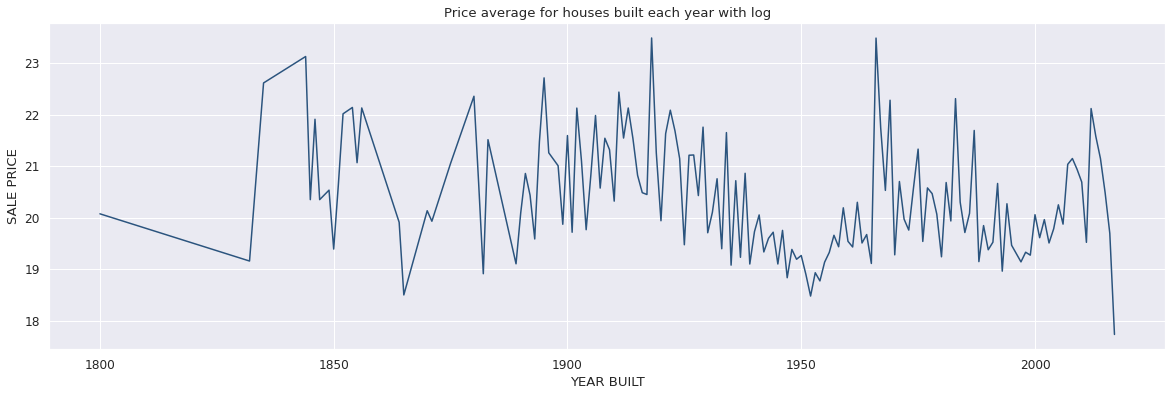

In [ ]:
Q3_col_log = Q3_col_group
Q3_col_log['SALE PRICE'] = np.log2(Q3_col_log['SALE PRICE'])
plt.figure(figsize=(20, 6))
sns.lineplot(data=Q3_col_log,x='YEAR BUILT',y='SALE PRICE' , color = '#2B547E').set_title('Price average for houses built each year with log')

>#### **Variables Analysis, multicollinearity**

*In this section, we are going to analyze the relationship between variables, which also helps us do feature engineering appropriately.*


>> ##### **(8) Neighbourhood and Year Built.**

                        YEAR BUILT
NEIGHBORHOOD                      
SPRING CREEK           2015.631579
CONCORD-FOX HILLS      1995.071429
ROSSVILLE-PORT MOBIL   1992.250000
WOODROW                1991.320611
DOWNTOWN-FULTON MALL   1990.629921
ROSSVILLE              1989.455556
DONGAN HILLS-OLD TOWN  1989.200000
ARDEN HEIGHTS          1987.718978
WILLIAMSBURG-SOUTH     1987.050265
ROSSVILLE-CHARLESTON   1985.592593
STAPLETON-CLIFTON      1985.015152
PRINCES BAY            1983.744361
WILLIAMSBURG-NORTH     1982.684746
BULLS HEAD             1982.669211
ANNADALE               1982.190751
CIVIC CENTER           1982.189003
TRAVIS                 1981.884211
ROOSEVELT ISLAND       1981.750000
NEW SPRINGVILLE        1980.720339
WILLOWBROOK            1979.884615


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

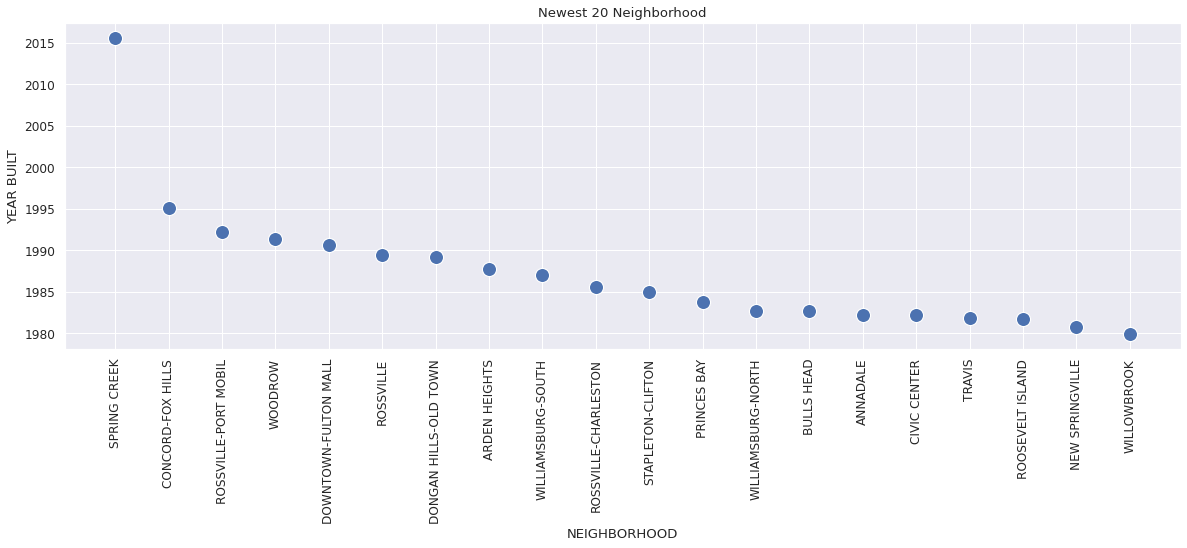

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
Q10_drop_null = nyc_rolling_sales[(nyc_rolling_sales['YEAR BUILT']!=0)]
Q10_sel_col = Q10_drop_null[['YEAR BUILT','NEIGHBORHOOD']].astype({'YEAR BUILT': 'int64'})
Q10 = Q10_sel_col.groupby(['NEIGHBORHOOD']).mean().sort_values('YEAR BUILT',ascending=False)
Q10_top = Q10.head(20)
print(Q10_top)
plt.figure(figsize=(20, 6))
sns.scatterplot(data=Q10_top,x='NEIGHBORHOOD',y='YEAR BUILT' , palette= 'Blues_r' , s = 200).set_title('Newest 20 Neighborhood')
plt.xticks(rotation=90)

                           YEAR BUILT
NEIGHBORHOOD                         
DOWNTOWN-METROTECH        1929.371212
PARK SLOPE SOUTH          1928.801136
BEDFORD PARK/NORWOOD      1927.847368
UPPER WEST SIDE (96-116)  1926.855385
CARROLL GARDENS           1925.976879
BROAD CHANNEL             1925.904762
RICHMOND HILL             1925.685135
WYCKOFF HEIGHTS           1924.943820
OCEAN HILL                1923.587896
FLATBUSH-LEFFERTS GARDEN  1921.729412
MOUNT HOPE/MOUNT EDEN     1921.535714
WASHINGTON HEIGHTS LOWER  1920.949275
LITTLE ITALY              1920.937500
WOODHAVEN                 1919.184466
HARLEM-UPPER              1917.710938
CYPRESS HILLS             1917.254593
HARLEM-WEST               1915.166667
BRONX PARK                1915.000000
FORDHAM                   1914.724638
COBBLE HILL               1913.362963


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

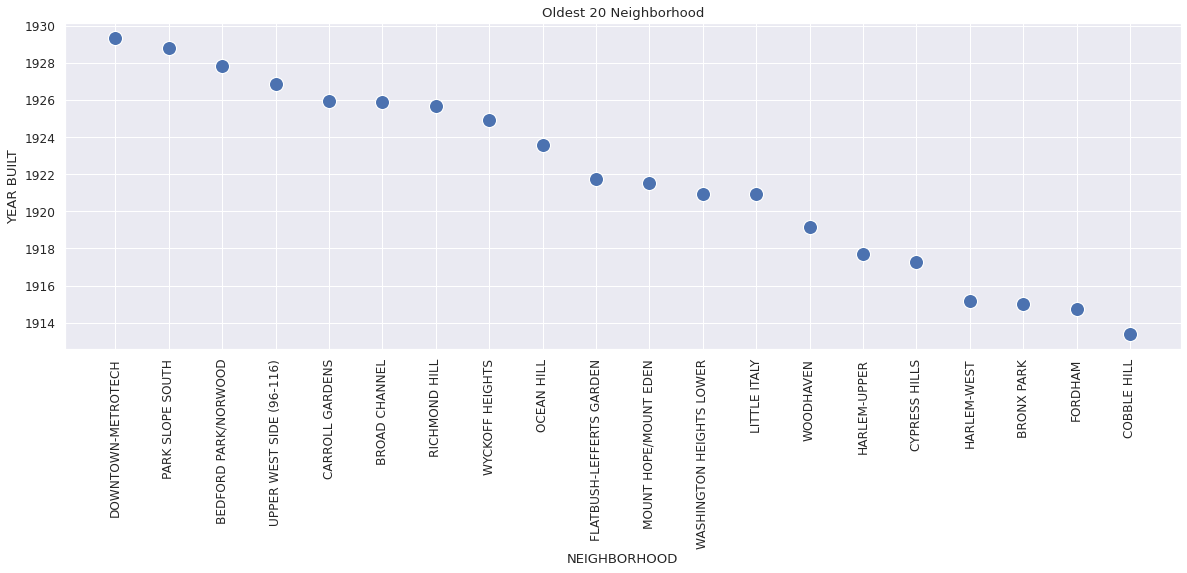

In [ ]:
Q10_bottom = Q10.tail(20)
print(Q10_bottom)
plt.figure(figsize=(20, 6))
sns.scatterplot(data=Q10_bottom,x='NEIGHBORHOOD',y='YEAR BUILT' , palette= 'Blues_r' , s = 200).set_title('Oldest 20 Neighborhood')
plt.xticks(rotation=90)

>>>For this section, we analyzed the relationship between neighborhood and year build, to see which neighborhood is younger and which is older. Our expectation was that newer neighborhoods will average a higher sales price.\
 \
 The chart below provides 5 newest and oldest neighborhood and their sales price. We group all data with neighborhoods and calculate the means of year built and sale prices. Then sorted according to the average built a year.\
 \
 Nevertheless, newer neighborhoods do not imply that the price will be higher. The prices did not come in sequential order. We conclude that the price of areas in the city remains static. For example, no matter which year a house is built in “MIDTOWN CBD” the price will remain high because of its location.

                      YEAR BUILT  SALE PRICE          NEIGHBORHOOD
NEIGHBORHOOD                                                      
SPRING CREEK                2015      384791          SPRING CREEK
CONCORD-FOX HILLS           1994      308214     CONCORD-FOX HILLS
WOODROW                     1992      667377               WOODROW
DOWNTOWN-FULTON MALL        1990     3077772  DOWNTOWN-FULTON MALL
ROSSVILLE                   1989      524124             ROSSVILLE
CYPRESS HILLS               1917      358905         CYPRESS HILLS
HARLEM-WEST                 1916     1832498           HARLEM-WEST
BRONX PARK                  1915      560000            BRONX PARK
FORDHAM                     1914     1673832               FORDHAM
COBBLE HILL                 1913     1039756           COBBLE HILL


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

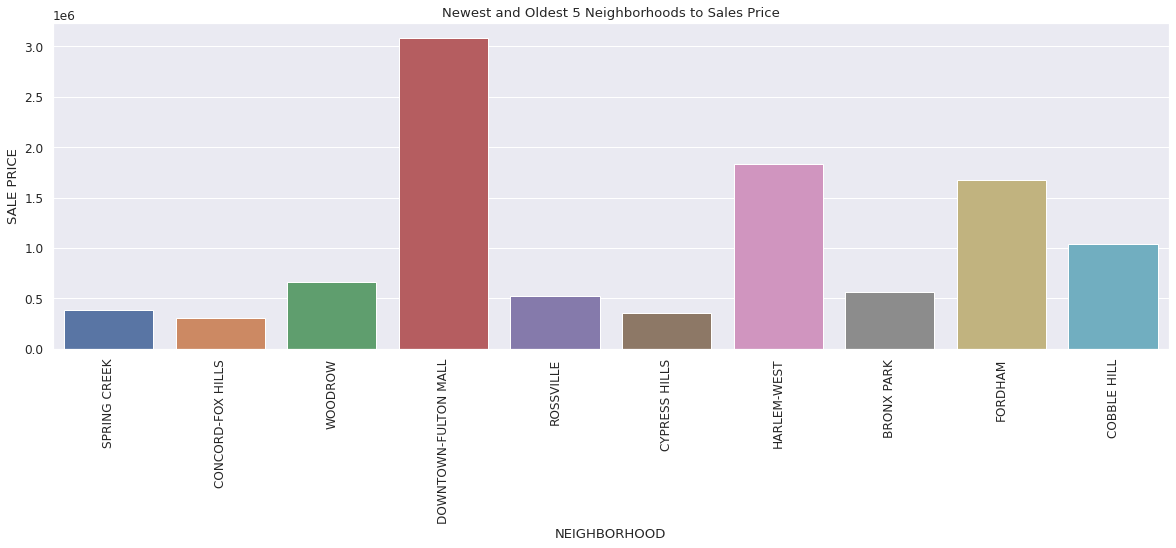

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
Q10_drop_null = nyc_rolling_sales[(nyc_rolling_sales['YEAR BUILT']!=0)&(nyc_rolling_sales['SALE PRICE']!=0)&(nyc_rolling_sales['SALE PRICE']!=' -  ')&(nyc_rolling_sales['SALE PRICE']!='')]
Q10_sel_col = Q10_drop_null[['YEAR BUILT','NEIGHBORHOOD','SALE PRICE']].astype({'YEAR BUILT': 'int64','SALE PRICE':'int64'})
Q10 = Q10_sel_col.groupby(['NEIGHBORHOOD']).mean().sort_values('YEAR BUILT',ascending=False).astype('int64') 
Q10_top = Q10.head(5)
Q10_bottom = Q10.tail(5)
Q10_top_bottom = pd.concat([Q10_top,Q10_bottom])
Q10_top_bottom['NEIGHBORHOOD'] = Q10_top_bottom.index
print(Q10_top_bottom)
plt.figure(figsize=(20, 6))
#sns.histplot(data=Q10_top_bottom,x='NEIGHBORHOOD',y='SALE PRICE').set_title('Newest and Oldest houses & Sales Price')
sns.barplot(x="NEIGHBORHOOD",y="SALE PRICE",data=Q10_top_bottom).set_title('Newest and Oldest 5 Neighborhoods to Sales Price')
plt.xticks(rotation=90)

>> ##### **(9) Correlation between square feet and total units**

>>>*  In this section, we examed the correlation between gross square feet and the total units of properties. 
*  Below, we can see the scatter plot of total units versus square feet of each property, grouped by borough, each plot shows a possible correlation.

In [ ]:
nyc_rolling_sales = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
Q7 = nyc_rolling_sales[(nyc_rolling_sales['SALE PRICE'] != 0) & (nyc_rolling_sales['SALE PRICE'] != ' -  ')]
Q7['SALE PRICE'] = Q7['SALE PRICE'].astype('float64')
Q7 = Q7[Q7['SALE PRICE'] > 0]
gross_square_feet_mean = Q7['GROSS SQUARE FEET'].replace( ' -  ' , np.nan ).astype('float64').mean(skipna = True)
Q7['GROSS SQUARE FEET'] = Q7['GROSS SQUARE FEET'].replace( ' -  ' , str(gross_square_feet_mean) ).astype('float64')
total_units_mean = Q7['TOTAL UNITS'].mean(skipna = True)
Q7['TOTAL UNITS'] = Q7['TOTAL UNITS'].replace( 0 , total_units_mean )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


,Borough Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


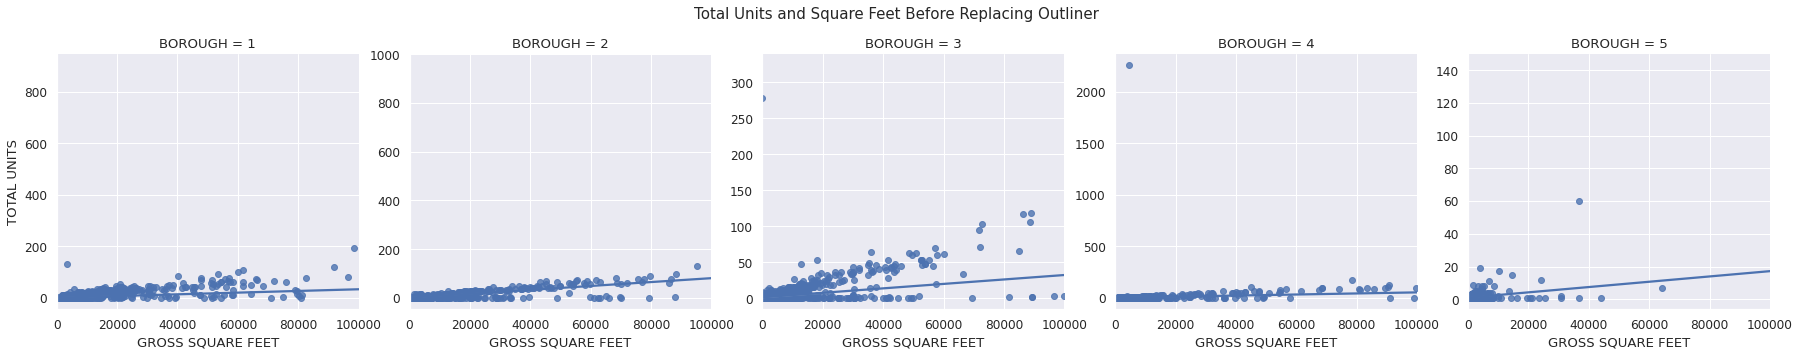

In [ ]:
tu_gsf_lm = sns.lmplot( x = 'GROSS SQUARE FEET' , y = 'TOTAL UNITS' , col = 'BOROUGH' , data = Q7 , sharex=False, sharey=False , ci = False , palette= 'Blues_r')
tu_gsf_lm.fig.subplots_adjust(top=0.85)
tu_gsf_lm.fig.suptitle('Total Units and Square Feet Before Replacing Outliner' , fontsize = 15)
tu_gsf_lm.set(xlim = ( 0 , 100000))
Borough_name

>>>  *  The graph above shows a scatter plot that total units VS. gross square feet, in different boroughs. The trend lines seem fit the data, and the correlation seems to be significant. This indicates we should do feature engineering by combining these two factors together or drop one of them. 

>>> *  The graph below is the distribution of the dataset, in which total units VS. gross square feet. Some points seem likely to be ourliers, so we tried filling these suspicious points with median and did the scatter plot again.

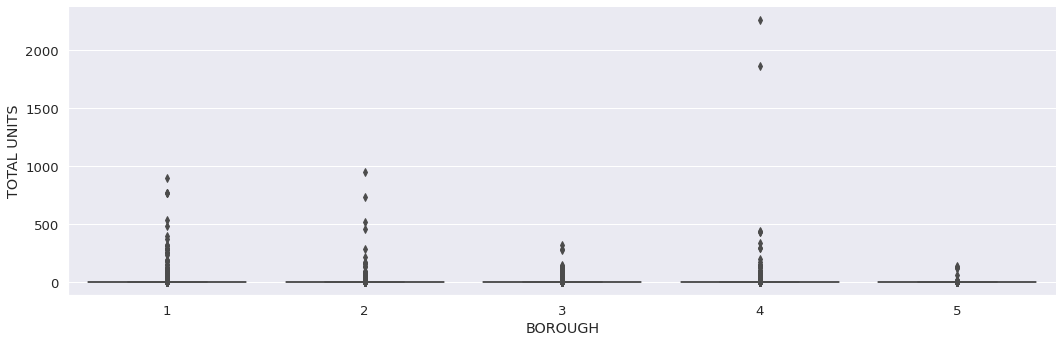

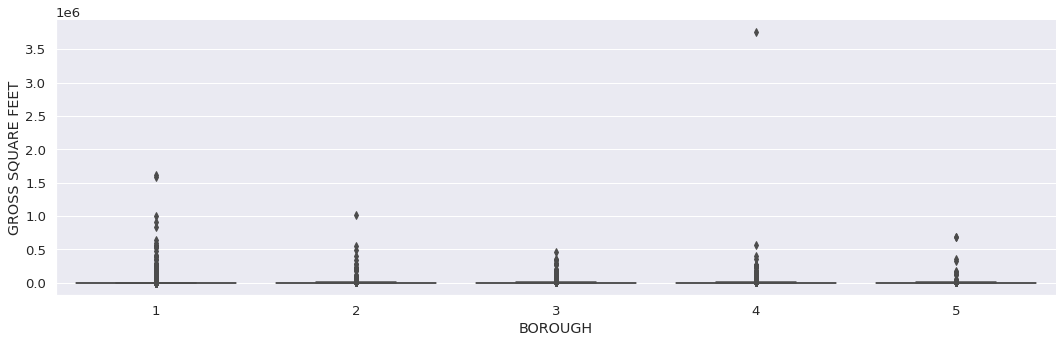

In [ ]:
sns.set(font_scale= 1.2)
sns.catplot(x = 'BOROUGH'  , y = 'TOTAL UNITS', data = Q7 , kind = 'box' ,height = 5,  aspect = 3)
sns.catplot(x = 'BOROUGH' , y = 'GROSS SQUARE FEET', data = Q7 , kind = 'box' ,height = 5 , aspect = 3)

In [ ]:
tu_median = Q7['TOTAL UNITS'].median()
gsf_median = Q7['GROSS SQUARE FEET'].median()
Q7['GROSS SQUARE FEET'] = np.where((Q7['GROSS SQUARE FEET'] > 200000) , gsf_median , Q7['GROSS SQUARE FEET'])
Q7['TOTAL UNITS'] = np.where((Q7['TOTAL UNITS'] > 300) , tu_median , Q7['TOTAL UNITS'])

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


,Borough Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


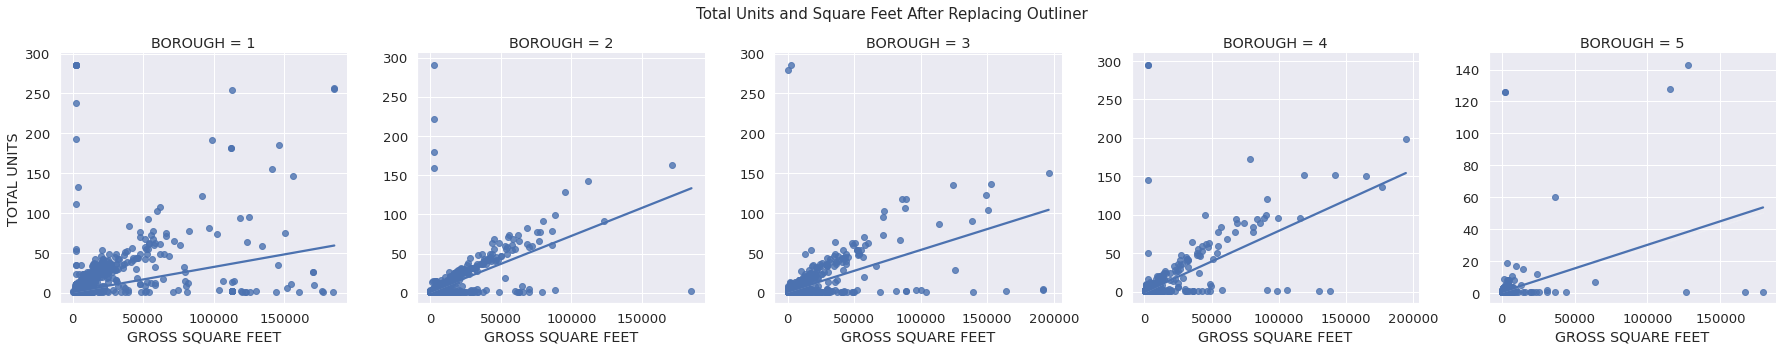

In [ ]:
tu_gsf_lm = sns.lmplot( x = 'GROSS SQUARE FEET' , y = 'TOTAL UNITS' , col = 'BOROUGH' , data = Q7 , sharex=False, sharey=False , ci = False , palette= 'Blues_r')
tu_gsf_lm.fig.subplots_adjust(top=0.85)
tu_gsf_lm.fig.suptitle('Total Units and Square Feet After Replacing Outliner' , fontsize = 15)
Borough_name

>>> As we can see from the scatter plots above, there are still some points that seem not to fit the trendline very well, but we can clearly see the correlation between total units and gross square feet. This result corresponds with our observations and in daily life and common sense,  that bigger houses usually have more rooms.  

> ### **Conclusion for EDA**
\
There are several aspects to study what factors affect property price in NYC. After the exploration of our dataset, we drew the following conclusions:

*  Most location factors are good predictors. \
The number and sale price of properties differ in each borough.\
Specifically, there are more properties in Manhattan, Queens, and Brooklyn, fewer properties in the Bronx and Staten Island.\
Apartments in Manhattan are the most expensive. Most of them are lofts.\
There are more big houses in Staten Island than in Manhattan.

* Building Features also have impact on property price.\
Generally, more square feet indicates more expensive.\
Residential properties are cheaper than properties for commercial, public, and business use.\
Most buildings are residencial, the the most common category is condo.\
Tax class also has a significant correlation with sale price. Specifically, the higher the tax class is, the wider the price range is, and the possible high price is higher.

* Some boroughs are 'old' in terms of the year of the properties were built. But the price does not vary much in neighborhoods built in different years.

* Total unit and gross square feet have a positive correlation, which means we should combine these two variables to one or simply drop one. We will figure it out at the feature engineering stage in the machine learning part.

## **III.Machine Learning**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### **Data Preparation**

>Firstly, just as EDA, we deleted the unnamed column, changed "-" to 0 in each column.\
Secondly, We transformed datatype, so every numbers should be either float or interger.\
Then, we checked how many null values in our dataset, and further handle the data.\
In earlier EDA, we find that total units is commercial units plus residential units. We decide to drop the residential units, only use total units.\
Land square feet means the land square feet the apartment occupies. Many rows have that attibute as zero, we decide to drop it.\
We also check the skewness of the data, its highly unbalanced, so we redistributed it.\
We also drop columns with "at present", because we only care about its attributes at the time of sale.\
Since the data is highly unbalanced, we normalized the dataset, so the machine learning will be fair.

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/David855008/BA780_project/main/nyc-rolling-sales.csv')
df.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [47]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [48]:
obj_columns = df.select_dtypes(include=['object'])
obj_columns.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,84548,254,FLUSHING-NORTH,3068
BUILDING CLASS CATEGORY,84548,47,01 ONE FAMILY DWELLINGS,18235
TAX CLASS AT PRESENT,84548,11,1,38633
EASE-MENT,84548,1,,84548
BUILDING CLASS AT PRESENT,84548,167,D4,12663
ADDRESS,84548,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,84548,3989,,65496
LAND SQUARE FEET,84548,6062,-,26252
GROSS SQUARE FEET,84548,5691,-,27612
BUILDING CLASS AT TIME OF SALE,84548,166,R4,12989


In [49]:
df = df[ df['SALE PRICE'] != ' -  ']
df['SALE PRICE'] = df['SALE PRICE'].astype('int')
df = df[ df['LAND SQUARE FEET'] != ' -  ']
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype('int')
df = df[ df['GROSS SQUARE FEET'] != ' -  ']
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype('int')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format= '%Y-%m-%d %H:%M:%S')
df.drop(['EASE-MENT' , 'ADDRESS' , 'APARTMENT NUMBER'], axis = 1, inplace = True)

In following table, we can see the decriptive data better.

In [50]:
num_columns = df.select_dtypes(exclude=['object'])
num_columns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,48244.0,3.251741e+00,9.031357e-01,1.0,3.00,3.0,4.0,5.000000e+00
BLOCK,48244.0,4.984532e+03,3.427418e+03,1.0,2206.75,4660.5,6996.0,1.631900e+04
LOT,48244.0,2.343247e+02,4.963615e+02,1.0,21.00,45.0,94.0,9.009000e+03
ZIP CODE,48244.0,1.093968e+04,1.072752e+03,0.0,10469.00,11217.0,11237.0,1.169400e+04
RESIDENTIAL UNITS,48244.0,2.566537e+00,1.746548e+01,0.0,1.00,1.0,2.0,1.844000e+03
COMMERCIAL UNITS,48244.0,2.491709e-01,1.098807e+01,0.0,0.00,0.0,0.0,2.261000e+03
TOTAL UNITS,48244.0,2.834632e+00,2.075042e+01,0.0,1.00,1.0,2.0,2.261000e+03
LAND SQUARE FEET,48244.0,3.358117e+03,3.143590e+04,0.0,1413.00,2140.0,3071.0,4.228300e+06
GROSS SQUARE FEET,48244.0,3.669753e+03,2.947491e+04,0.0,828.00,1620.0,2520.0,3.750565e+06
YEAR BUILT,48244.0,1.827765e+03,4.643612e+02,0.0,1920.00,1931.0,1961.0,2.017000e+03


Check how many 0 values in the following columns.

In [51]:
num_columns = list(num_columns.columns)
print('Number of 0 in num_columns:' , '\n')
for i in num_columns:
    x = (df[i]==0).sum()
    print('{0:35s} {1}'.format(i , x))

Number of 0 in num_columns: 

BOROUGH                             0
BLOCK                               0
LOT                                 0
ZIP CODE                            391
RESIDENTIAL UNITS                   7994
COMMERCIAL UNITS                    44222
TOTAL UNITS                         5181
LAND SQUARE FEET                    10326
GROSS SQUARE FEET                   11417
YEAR BUILT                          2911
TAX CLASS AT TIME OF SALE           0
SALE PRICE                          10228
SALE DATE                           0


Next, we checked the percentage of the 0 values in columns which can not be zero.\
Then take the zero values out of the col_cannot_be_zero column.


In [52]:
col_cannot_be_zero = [ 'ZIP CODE', 'LAND SQUARE FEET' , 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']

print('Percentage zero in columns which should not have zero:' , '\n')
for i in col_cannot_be_zero:
    print("{0:25s} {1}".format(i,str(round((df[i] == 0 ).sum()/df.shape[0] * 100 , 2)) + '%' ))

Percentage zero in columns which should not have zero: 

ZIP CODE                  0.81%
LAND SQUARE FEET          21.4%
GROSS SQUARE FEET         23.67%
YEAR BUILT                6.03%
SALE PRICE                21.2%


In [53]:
for i in col_cannot_be_zero:
    df = df[df[i] != 0]

See how many object we have in our dataset.

In [54]:
categorical = df.select_dtypes(include=['object'])
categorical.describe().transpose()

,count,unique,top,freq
NEIGHBORHOOD,29308,249,FLUSHING-NORTH,796
BUILDING CLASS CATEGORY,29308,30,01 ONE FAMILY DWELLINGS,12929
TAX CLASS AT PRESENT,29308,6,1,25452
BUILDING CLASS AT PRESENT,29308,124,A1,4837
BUILDING CLASS AT TIME OF SALE,29308,128,A1,4833


In earlier EDA, we find that total units is commercial units plus residential units. We decide to drop the residential units.\
Land square feet means the land quare feet the apartment occupies. Many rows have that attibute as zero, we decide to drop it.\
Also, we decide to drop some outliners in the Sale Price.

In [55]:
df.drop(["RESIDENTIAL UNITS", "LAND SQUARE FEET"], axis = 1, inplace = True)
df = df[(df['SALE PRICE'] < 5.5e8) & (df['SALE PRICE'] > 1e5)]
df.shape

(27887, 16)

We also check how this dataset distributed, its skewness. \
We can see the data is highly unbalanced.

In [56]:
df["SALE PRICE"].skew()

20.80654788564923

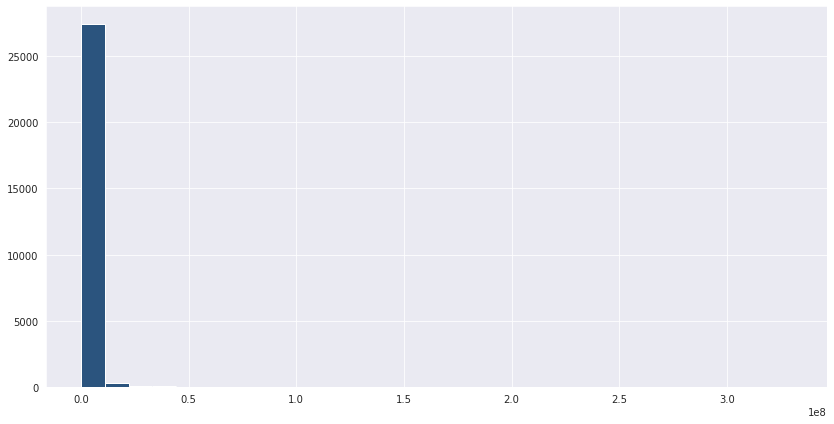

In [57]:
plt.figure(figsize=(14, 7))
plt.hist(df["SALE PRICE"], bins =30 , color = '#2B547E')
plt.show()

Then we redistribute it. 

In [58]:
log_price = np.log(df["SALE PRICE"])
print(log_price.skew())

1.7440312264955338


Now the data is normalized.
We have relatively a large set of data(more than 50000rows), we belive that should still be a effective number after nomalization. We will see if the machine learning work well later.

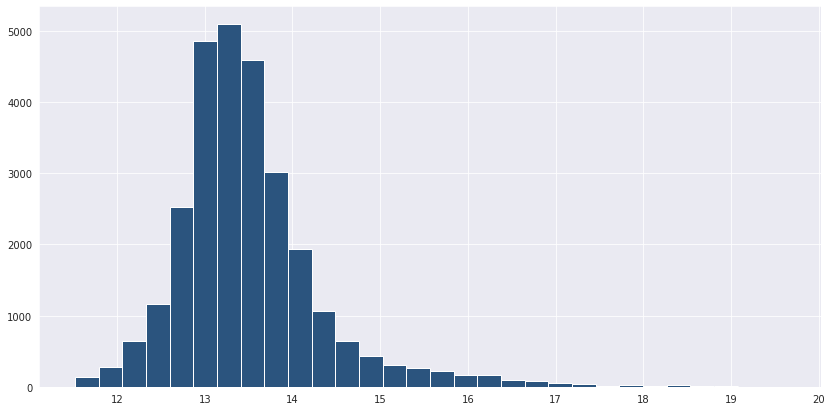

In [59]:
plt.figure(figsize=(14, 7))
plt.hist(log_price, bins =30 , color = '#2B547E')
plt.show()

Then we check the distribution of the total units.

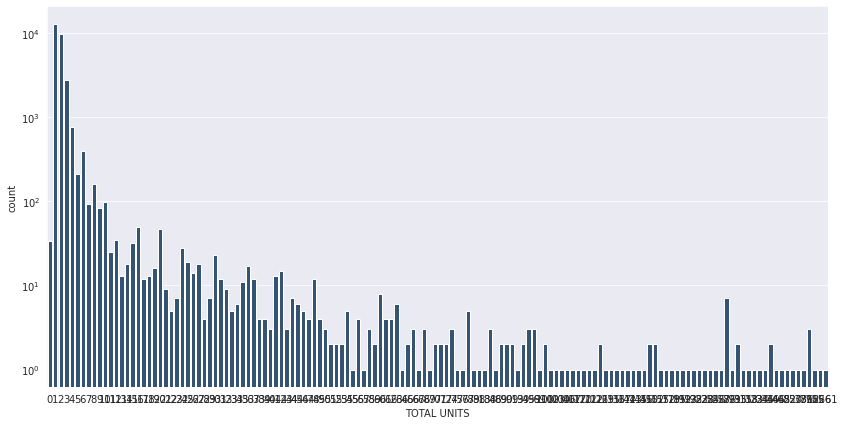

In [60]:
plt.figure(figsize=(14, 7))
sns.countplot(x='TOTAL UNITS', data = df, log=True , color = '#2B547E')
plt.show()

There are some numbers seem to be outliers. For a better fit, we eliminated the outliers.

In [61]:
df = df[df['TOTAL UNITS'] < 100]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27821 entries, 0 to 84546
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         27821 non-null  int64         
 1   NEIGHBORHOOD                    27821 non-null  object        
 2   BUILDING CLASS CATEGORY         27821 non-null  object        
 3   TAX CLASS AT PRESENT            27821 non-null  object        
 4   BLOCK                           27821 non-null  int64         
 5   LOT                             27821 non-null  int64         
 6   BUILDING CLASS AT PRESENT       27821 non-null  object        
 7   ZIP CODE                        27821 non-null  int64         
 8   COMMERCIAL UNITS                27821 non-null  int64         
 9   TOTAL UNITS                     27821 non-null  int64         
 10  GROSS SQUARE FEET               27821 non-null  int64         
 11  YE

We also drop columns with "at present", because we only care about its attributes at the time of sale.

In [63]:
df.drop(['BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE','NEIGHBORHOOD','TAX CLASS AT PRESENT'], axis = 1, inplace = True)

Change the sale date to numeric data.\
Since we use numeric_cols to redistribute data, but we cannot change the skewness with the sale date, so we only modify the data so we can normalize the data.

In [64]:
df["SALE DATE"] = pd.to_numeric(df["SALE DATE"])
numeric_cols = list(df.select_dtypes(exclude=['object']).columns)
numeric_cols.remove("SALE DATE")

In [65]:
for col in numeric_cols:
    if df[col].skew() > 1:
        df[col] = np.log1p(df[col])

Now, we check the heat map again, see if there is any further data handling needed.

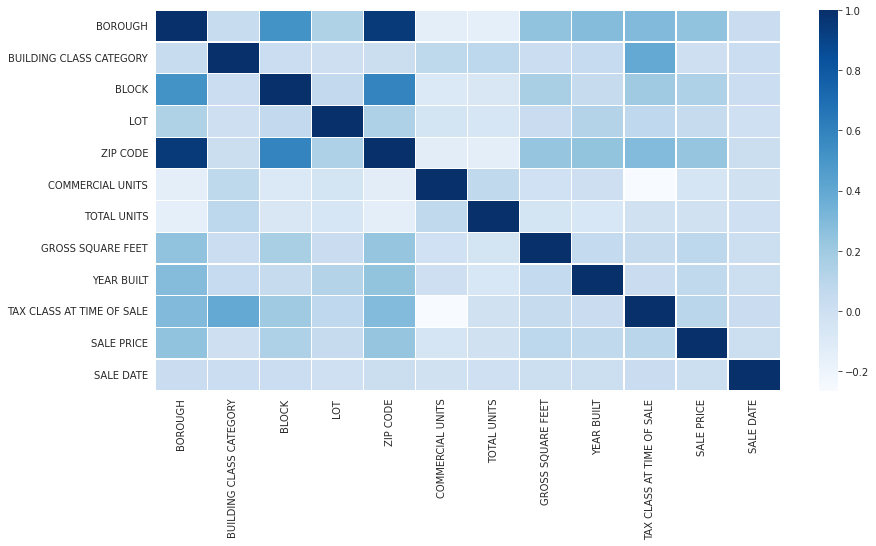

In [66]:
plt.figure(figsize=(14, 7))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="Blues")

Dummify the categorical variables.

In [67]:
df = pd.get_dummies(df , columns = ['BOROUGH' , 'TAX CLASS AT TIME OF SALE' , 'BUILDING CLASS CATEGORY'] , drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27821 entries, 0 to 84546
Data columns (total 44 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   BLOCK                                                                 27821 non-null  int64  
 1   LOT                                                                   27821 non-null  float64
 2   ZIP CODE                                                              27821 non-null  int64  
 3   COMMERCIAL UNITS                                                      27821 non-null  float64
 4   TOTAL UNITS                                                           27821 non-null  float64
 5   GROSS SQUARE FEET                                                     27821 non-null  float64
 6   YEAR BUILT                                                            27821 non-null  int64  


Our dataset ready to train, and here is a peek of our feature enginered dataset.

In [68]:
df.head(3)

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,TAX CLASS AT TIME OF SALE_1.0986122886681096,TAX CLASS AT TIME OF SALE_1.6094379124341003,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER
0,392,1.945910,10009,0.0,1.791759,8.770439,1900,15.706361,1500422400000000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,402,3.091042,10009,0.0,2.397895,8.823942,1913,15.185745,1474588800000000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,404,4.025352,10009,0.0,1.945910,8.437284,1900,15.894952,1479340800000000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Fit Models and Model Seletion**

After the data is prepared, we are ready for machine learning:\
For this section, we started with the basic models:
 \
 \
Linear Regression\
Regularization with ridge\
Lasso\
Decision Tree\
 \
**Some other (advanced) models:**\
 \
K-Nearest model

Elastic net

Adaboost

XGboost
 \
 \
We think XGboost works best.\
"XGboost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples." (from XGboost website)



\
set the train and test sets firstly

In [69]:
X = df.drop('SALE PRICE' , axis = 1)
y = df['SALE PRICE']
print(X.shape)
print(y.shape)

(27821, 43)
(27821,)


Here we split the data randomly into train and test with a 70-30 split, and set the random state to 780, makeing sure that such train and test split outcome is reproducible.

In [70]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=780)

#### **Linear Regression**

Mean squared error:                 0.6135362739430281
Coefficient of determination:       0.12985659825264695


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Linear Regression')

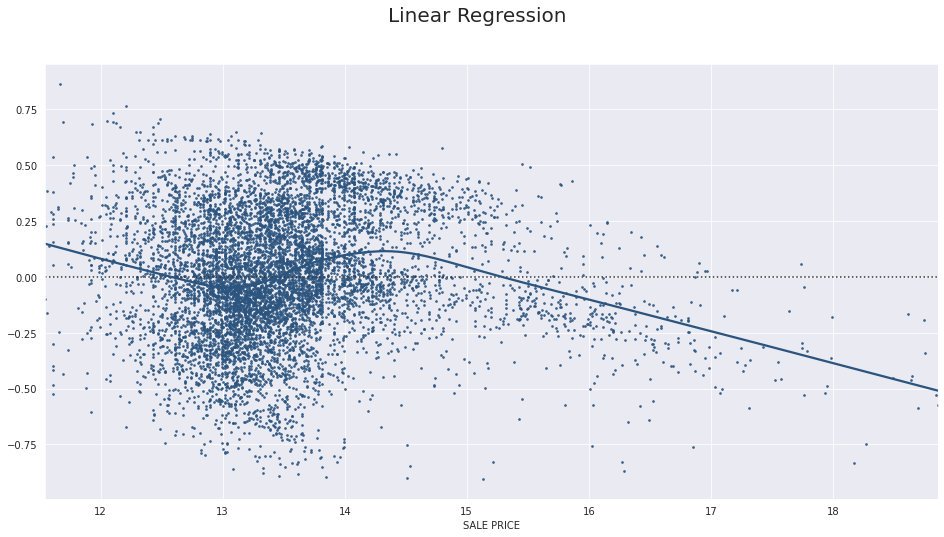

In [71]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color='#2B547E', scatter_kws={"s": 3} , lowess=True)
plt.suptitle('Linear Regression' , fontsize = 20)

Above is the simple linear regression's residual scatter plot with prediction model.\
The residual plot seems fine, since the residual distribute both in the up and the down side, not skew to only one side.\
However, the residuals are a little bit large, which we can also see from the MSE.

#### **Ridge**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.36303e-38): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Mean squared error:                 0.2498732038458306
Coefficient of determination:       0.6456191282667167


Text(0.5, 0.98, 'Ridge')

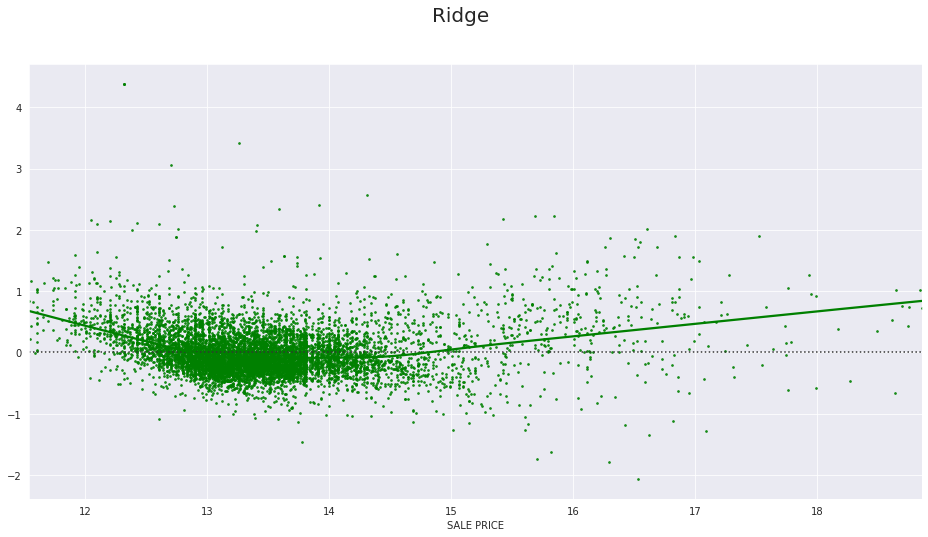

In [72]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Ridge(alpha=0.1)
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="green", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('Ridge' , fontsize = 20)

Above is the residual scatter plot with prediction model of simple linear regression with Ridge regularization. \
Residuals are also distribute on both sides, and this time, most residuals seem to be closer to zero.\
Which means this the regularization helps our model to improve.

#### **Lasso**

Mean squared error:                 0.34974153885128406
Coefficient of determination:       0.5039815814106707


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Lasso')

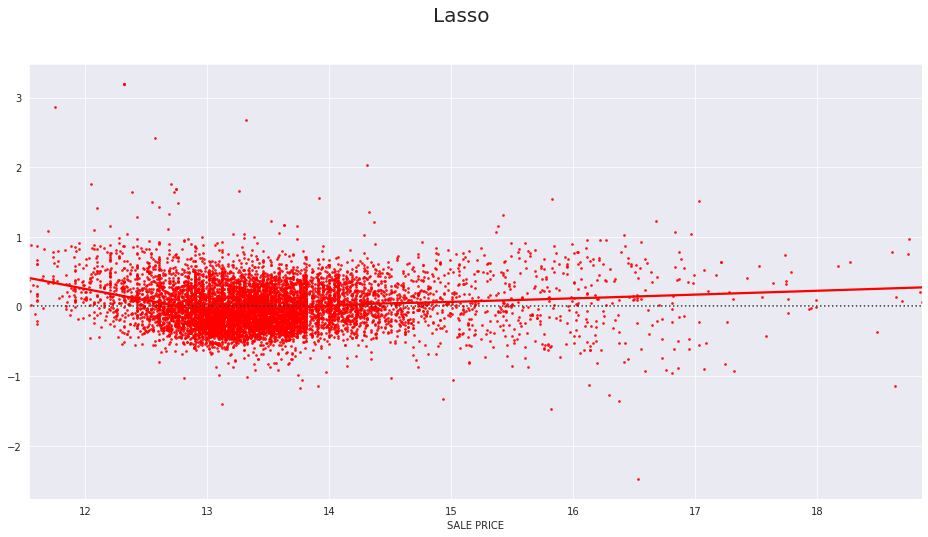

In [73]:
from sklearn import linear_model
model = linear_model.LassoLars(alpha=0.1, normalize=False)
model.fit(Xtrain , ytrain)

y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="red", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('Lasso' , fontsize = 20)

Above is the scatter plot with prediction model of simple linear regression with Lasso regularization. \
Similar to ridge, the residuals are also distribute on both sides, and this time, most residuals seem to be closer to zero.\
Wich means this the regularization helps our model to improve.

Shown below, is the features selected by Lasso regularization.\
The gross square feet has highest coef which makes sense because bigger properties are more expensive.\
Two location factors are kept, which means the location does affect the price.\
Our Lasso regression kept the year built and the coeffient is negative, which means older properties are more expensive.\
The sale date is kept, and the coef is positive, which means, the more recent sold properties are relatively more expensive. This indicates a general rise of property price.


In [74]:
features_coef = model.coef_.tolist()
feature_name = Xtrain.columns.tolist()
x = {'Feature Name' : feature_name , 'Feature Coef' : features_coef}
important_features = pd.DataFrame(x)
important_features[important_features['Feature Coef'] != 0]

,Feature Name,Feature Coef
0,BLOCK,-6.076153e-05
2,ZIP CODE,2.908357e-04
5,GROSS SQUARE FEET,5.622336e-01
6,YEAR BUILT,-1.537552e-03
7,SALE DATE,2.753842e-18


#### **K-Nearest Neighbors**

Mean squared error:                 0.6688592114840004
Coefficient of determination:       0.05139524052854283


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'K-Nearest Neighbors')

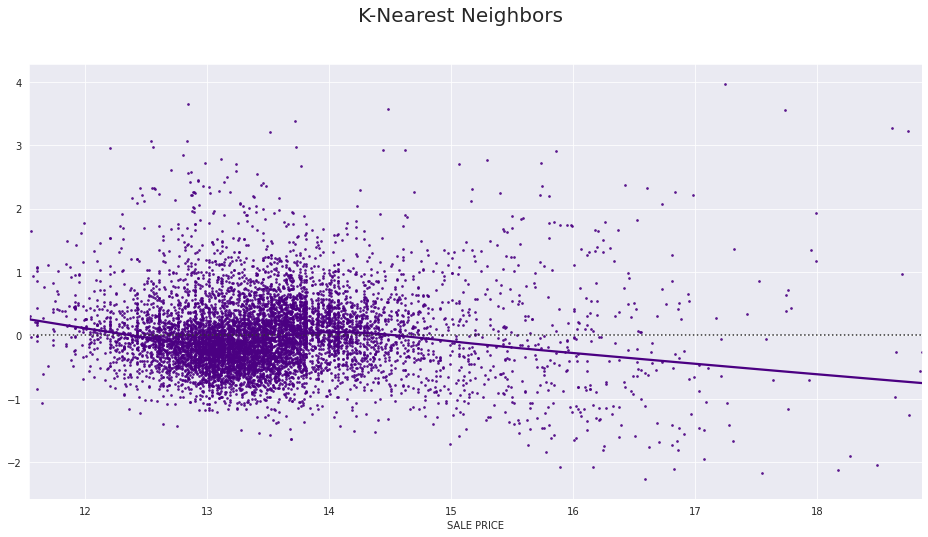

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = KNeighborsRegressor(n_neighbors=2)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))


plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="indigo", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('K-Nearest Neighbors' , fontsize = 20)

Above is the simple linear K-nearest's residual scatter plot. \
Residuals distribute on both sides, but residuals seem father from zero compared to the Lasso regression.

#### **Elastic Net**

Mean squared error:                 0.340741155401915
Coefficient of determination:       0.516746310415743


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Elastic Net')

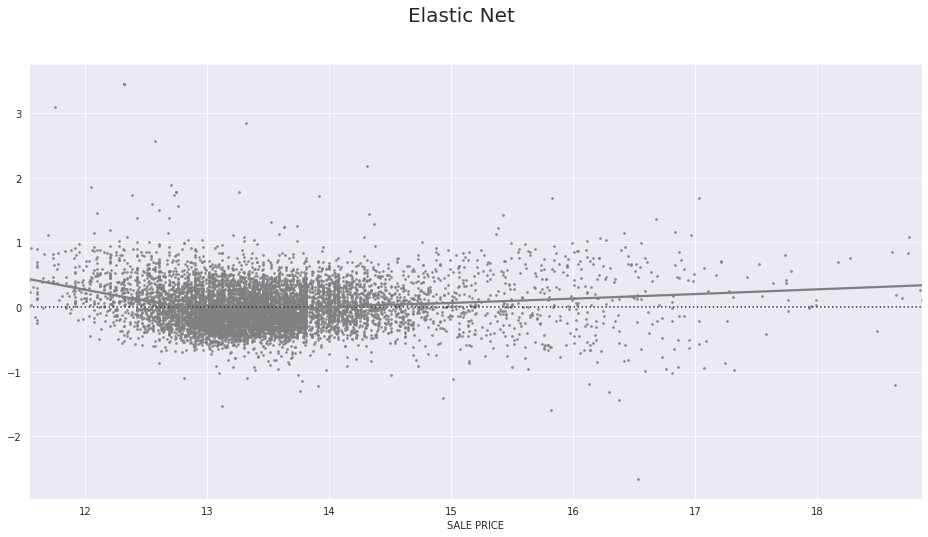

In [76]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.1)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="gray", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('Elastic Net' , fontsize = 20)

Above is the simple linear elastic net's residual plot.\
Residuals distrubute on both sides, which means the model is fair.\
Residuals are relatively close to zero, which means the models predicts is not bad.

#### **DecisionTree**

Mean squared error:                 0.36958741316869964
Coefficient of determination:       0.4758353130927033


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Decision Tree')

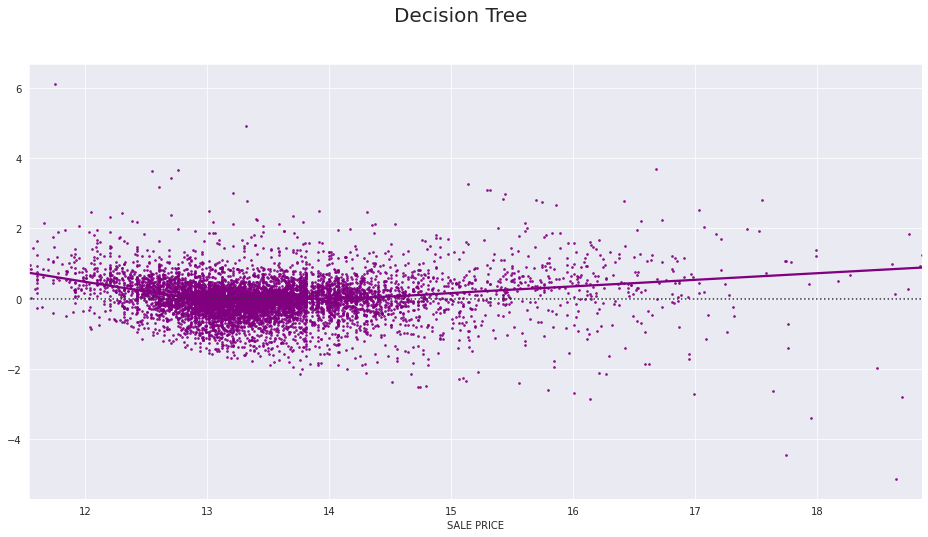

In [77]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 100)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="purple", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('Decision Tree' , fontsize = 20)

Above is the  Decision Tree's residual scatter plot. \
Residuals distribute on both sides, most of residuals are close to zero, but some residuals are far from zero.\
According to the residual plot, this is a fair model. \
The MSE and r squarer still seemed can be improved.

#### **AdaBoost**

Mean squared error:                 0.1989768863074409
Coefficient of determination:       0.7178024640532823


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'AdaBoost')

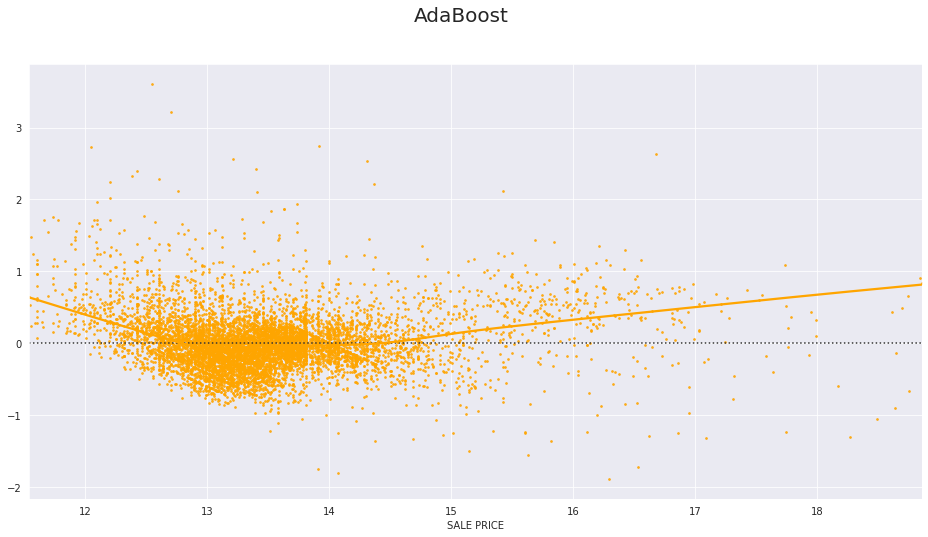

In [78]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=100), n_estimators = 1000)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="orange", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('AdaBoost' , fontsize = 20)

Above is the simple linear Ada Boost's residul scatter plot. \
Residuals distribute on both sides, most of residuals are close to zero, but some residuals are far from zero. \
The MSE and coefficient of determination are good, the model fits very well and the errors are relatively less.

\
 So we decide to try a similar one but with a stronger fitting ability which is XGBoost.

#### **XGBoost**

Import package and setting potential parameters:

In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost.sklearn import XGBRegressor
model = XGBRegressor()
params={
 'learning_rate'    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 'max_depth'        : [ 3, 4, 5, 6, 8, 10, 12, 15 , 20 , 30 , 40 , 50 , 100],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma'            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree'  : [ 0.3, 0.4, 0.5 , 0.7 ] , 
'n_estimators'      : [100 , 500 , 1000 , 1500 , 2000]
}

Find the best tuning combination, using the 5-Fold Cross Valisdation.

The best tuinig combination is shown at the end of the output.

In [80]:
random_search=RandomizedSearchCV(model,param_distributions=params)
search = random_search.fit(Xtrain , ytrain)
search.best_estimator_

[04:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=50, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Fit the model

[04:55:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error:                 0.16611635102883232
Coefficient of determination:       0.7644066815460894


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


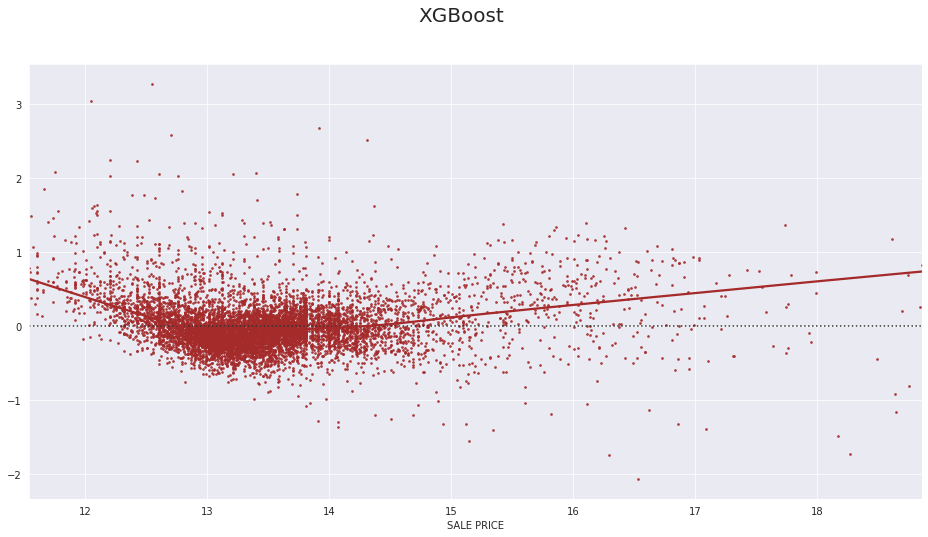

In [81]:
model = search.best_estimator_
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

print('{0:35s} {1}'.format( 'Mean squared error:' , mean_squared_error(ytest, y_model)))
print('{0:35s} {1}'.format( 'Coefficient of determination:' , r2_score(ytest, y_model)))

plt.figure(figsize=(16, 8))
sns.residplot(ytest, y_model, color="brown", scatter_kws={"s": 3} , lowess=True)
plt.suptitle('XGBoost' , fontsize = 20)
plt.show()

From plot above, we can see the residual plot resulted from XGboost model.\
Residuals locate in both sides(more than zero and below zero). \
Comparing this plot with other plot, we can see residuals close to zero are more condense, which means the model's predictions are closer to the actual sale price.

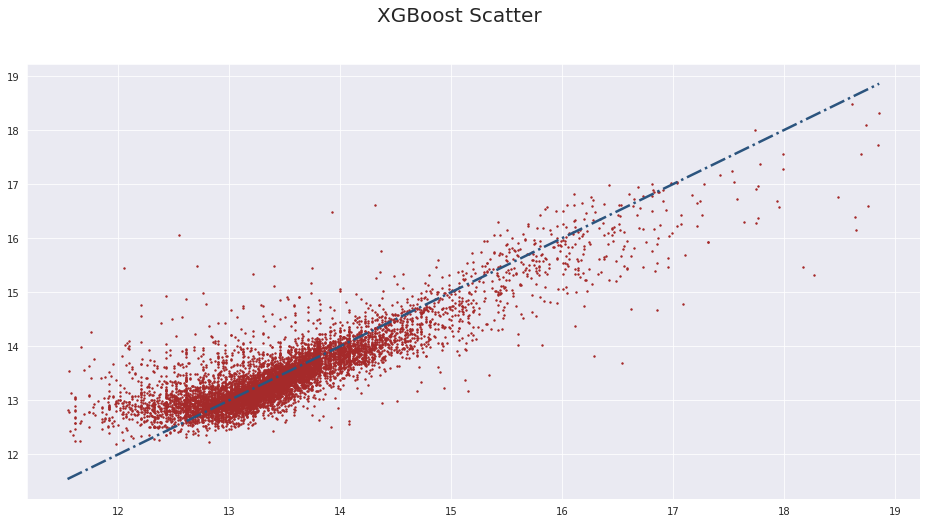

In [82]:
plt.figure(figsize=(16, 8))
plt.scatter(x = ytest, y = y_model, s=2 , color="brown")
plt.plot([min(ytest.to_list()), max(ytest.to_list())], [min(ytest.to_list()), max(ytest.to_list())], ls='-.', c='#2B547E', lw=2.5)
plt.suptitle('XGBoost Scatter' , fontsize = 20)
plt.show()

The horizontal axis is the actual sale price, and the vertical axis is the predicted sale price. If points are close to the dotted line, the prediction of the sale price is close to the actual sale price.\
 \
From this plot, we can see that the prediction is relatively accurate.

#### **Prediction Game**
Now with the model, we can play a prediction game. Just enter the information of a property, you can see its potential sale price.


In [84]:
import pandas as pd
block = int(input("Block:"))
lot = float(input("Lot:"))
zip = int(input("ZIP CODE:"))
c_units = float(input("COMMERCIAL UNITS:"))
t_units = float(input("TOTAL UNITS:"))
g_sqrt_ft = float(input("GROSS SQUARE FEET:"))
year = int(input("YEAR BUILT:"))
sale_date = int(input("SALE DATE:"))
bor = int(input("Borough:"))
tax_class = float(input("TAX CLASS AT TIME OF SALE:"))
building_class = int(input("BUILDING CLASS CATEGORY:"))
bor_list = [0]*5
bor_list[bor-1] = 1
cat = [0]*41
cat[building_class-1] = 1
if tax_class > 1.6094:
  tax_class_list = [0,1]
elif tax_class > 1.0986:
  tax_class_list = [1,0]
else:
  tax_class_list = [0,0]
d = {
    'BLOCK':block, 'LOT':lot, 'ZIP CODE':zip, 'COMMERCIAL UNITS':c_units, 'TOTAL UNITS':t_units,
       'GROSS SQUARE FEET':g_sqrt_ft, 'YEAR BUILT':year, 'SALE DATE':sale_date, 'BOROUGH_2':bor_list[1],
       'BOROUGH_3':bor_list[2], 'BOROUGH_4':bor_list[3], 'BOROUGH_5':bor_list[4],
       'TAX CLASS AT TIME OF SALE_1.0986122886681096':tax_class_list[0],
       'TAX CLASS AT TIME OF SALE_1.6094379124341003':tax_class_list[1],
       'BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                    ':cat[1],
       'BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                  ':cat[2],
       'BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND                 ':cat[4],
       'BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER                     ':cat[5],
       'BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS             ':cat[6],
       'BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS           ':cat[7],
       'BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS               ':cat[8],
       'BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS             ':cat[9],
       'BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS              ':cat[10],
       'BUILDING CLASS CATEGORY_11A CONDO-RENTALS                           ':cat[10],
       'BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT                     ':cat[13],
       'BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS                        ':cat[20],
       'BUILDING CLASS CATEGORY_22 STORE BUILDINGS                         ':cat[21],
       'BUILDING CLASS CATEGORY_23 LOFT BUILDINGS                          ':cat[22],
       'BUILDING CLASS CATEGORY_25 LUXURY HOTELS                           ':cat[24],
       'BUILDING CLASS CATEGORY_26 OTHER HOTELS                            ':cat[25],
       'BUILDING CLASS CATEGORY_27 FACTORIES                               ':cat[26],
       'BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES                      ':cat[28],
       'BUILDING CLASS CATEGORY_30 WAREHOUSES                              ':cat[29],
       'BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND                  ':cat[30],
       'BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES          ':cat[31],
       'BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES                  ':cat[32],
       'BUILDING CLASS CATEGORY_34 THEATRES                                ':cat[33],
       'BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES   ':cat[34],
       'BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES         ':cat[35],
       'BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES                    ':cat[36],
       'BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES                       ':cat[37],
       'BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES        ':cat[39],
       'BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER                     ':cat[40]
}
x_test = pd.DataFrame(data = d, index=[0])
y_test = model.predict(x_test)
print(np.exp(y_test))

Block:2
Lot:4
ZIP CODE:10009
COMMERCIAL UNITS:10
TOTAL UNITS:50
GROSS SQUARE FEET:10000
YEAR BUILT:1997
SALE DATE:2008
Borough:1
TAX CLASS AT TIME OF SALE:24
BUILDING CLASS CATEGORY:7
[14948599.]


## **Conclusion**


In our project, we explored and analyzed NYC's property sale price. We found out what factors influence the sale price and also the relationship among factors.

*  **Location matters.**  \
From EDA, we see prices vary significantly in different boroughs. Our machine learning also confirms the location factors' significance. In Lasso regression, block and zip code are features kept, which means they are important features.
Our common sense tells us the same thing, in places like Manhattan (central business district), the sale price of the property is higher. Properties are also more concentrated in places like Manhattan (central business district). So there are more apartments or lofts other than houses. However, big houses in Staten Island are more common.
 
\
* **Property prices rose over years.** \
We missed this fact at first when we did EDA, but after we numeric the sale date, we found that the sale date did affect the sale price significantly. The sale price of the same property sold in different years would not be the same. 

\
* **Building Features also have an impact on property price.** \
Generally, the bigger the house is, the higher the price will be. **Secondly, we found the year built of the property matters.** We found that after we did machine learning. Unlike other cities with fewer ancient houses, there are many ancient mansions in NYC. Unlike residential houses, these mansions are more expensive as time passes. This is our explanation of the negative coefficient of year built. \
The analysis we did in EDA does not show an obvious correlation between the year built and sale price, but the Lasso helped us find it. Generally, residential properties are cheaper than properties for commercial, public, and business use. Most buildings are residential, and the most common category is the condo. Tax class also has a significant correlation with the sale price in EDA. Specifically, the higher the tax class is, the wider the price range is, and the possible high price is higher.

\
* **Machine Learning and the model**\
In the machine learning process, we did try different types of models. Though we only choose one at the end, the Lasso regression did give us a better sense of our important variables, since it made many betas to be zero, and we see what variables were left. The model that we decided to use and created the predicting game is the XGBoost since its performance is the best (lowest MSE and highest coefficient of determination). We believe our model should provide a relatively accurate prediction on the sale price when information on properties is given.

\
*  **Final Words**\
As we phrased in the beginning, we provide a model and insights for people who are interested in the real estate market of NYC. People can use our model to evaluate whether the price is reasonable when considering purchasing properties in NYC. We also hope our project contributes to the research in the real estate market in the future.



## **References:**
https://seaborn.pydata.org/generated/seaborn.residplot.html \
https://machinelearningmastery.com/xgboost-for-regression/ \
https://www.youtube.com/watch?v=LsK-xG1cLYA \
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html \
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html \
https://www.kaggle.com/arielyssou/nyc-property-regression \
https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso \
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB \
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html \
https://www.geeksforgeeks.org/numpy-log1p-python/ \
https://seaborn.pydata.org/examples/residplot.html \
https://github.com/krishnaik06/Hyperparameter-Optimization/blob/master/Hyperparameter%20Optimization%20For%20Xgboost.ipynb \
https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning#3.-Basic-Setup- \
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html \
https://xgboost.readthedocs.io/en/latest/